# Instacart Market Basket Analysis
 
Data Source: https://www.kaggle.com/c/instacart-market-basket-analysis/data <br>

Instacart is an American company that operates a grocery delivery and pick-up service in the United States and Canada.

Instacart aims to make it easy to refill your refrigerator and pantry with grocery items when you need them. After selecting products through the app, a personal shopper reviews your order and do the in-store shopping on your behalf and deliver it for you. Instacart offers its services through their website and their mobile application.

# About the Dataset

Data can be broadly classified into 3 parts.

<li> Prior data: refers to order history of each user. This dataset contains nearly 3–100 past orders per user
<li> Train data: refers to current order data of each user. This dataset contains only 1 order per user
<li> Test data: refers to order data of each user. This dataset does not contain any product information (This is what we want to predict for every user) <br>

The dataset contains the six following files:

<li> orders.csv — contains order details placed by any user, shape: (3421083, 7)
<li> order_products__prior.csv — contains all product details for any prior order, shape: (32434489, 4)
<li> order_products__train.csv — contains all product details for a train order, shape: (1384617, 4)
<li> products.csv — contains details of a product, shape: (49688, 4)
<li> aisles.csv — contains details of aisles, shape: (134,2)
<li> department.csv — contains details of department, shape: (21,2)
    
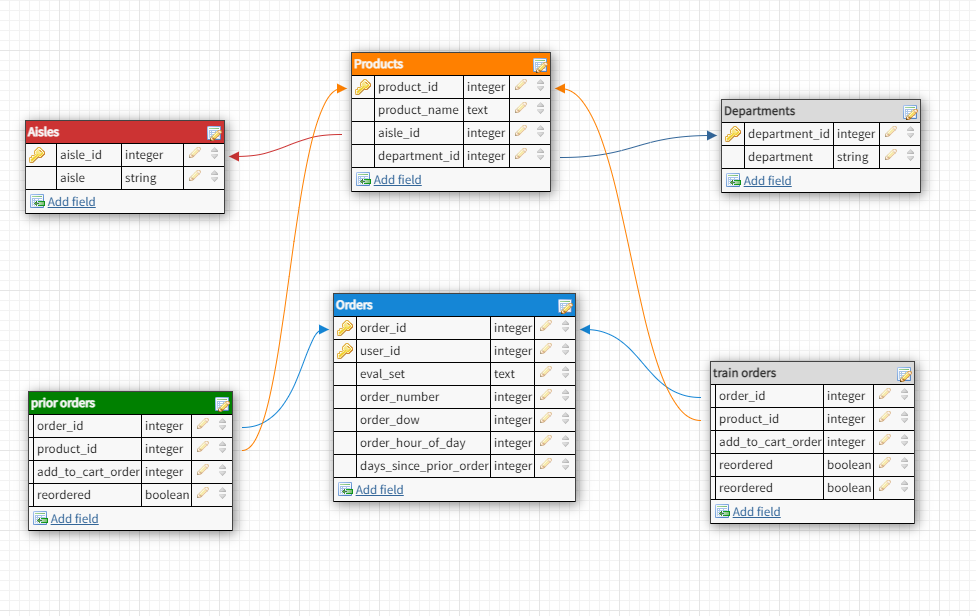

# ML Approach to Market Basket Analysis

This problem differs slightly from the conventional recommendation problem (such as the Netflix recommendation system), as in such problems, we generally recommend products (or movies) that are either common to similar users or similar to the products that the users have already purchased (or viewed).

However, in this case, we must recommend products that the user is likely to reorder. Hence, this problem can be modeled as a supervised learning binary classification problem. With binary labels indicating whether or not a previously ordered product will be reordered. We must develop features that summaries information about the user’s purchase history and the products contained within those orders.

# Performance Metric 
Mean F1 Score (predefined evaluation metrics)

<hr/>

<h2> 1. Importing packages

In [1]:
# Import Statements
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h2> 2. Reading Data

In [2]:
# Importing each csv files
orders = pd.read_csv('F:/SEMESTER 3/DAB 303 - Marketing Analytics/Individual Project/Instacart/instacart-market-basket-analysis/orders.csv')
products = pd.read_csv('F:/SEMESTER 3/DAB 303 - Marketing Analytics/Individual Project/Instacart/instacart-market-basket-analysis/products.csv')
aisles = pd.read_csv('F:/SEMESTER 3/DAB 303 - Marketing Analytics/Individual Project/Instacart/instacart-market-basket-analysis/aisles.csv')
department = pd.read_csv('F:/SEMESTER 3/DAB 303 - Marketing Analytics/Individual Project/Instacart/instacart-market-basket-analysis/departments.csv')
order_products_prior = pd.read_csv('F:/SEMESTER 3/DAB 303 - Marketing Analytics/Individual Project/Instacart/instacart-market-basket-analysis/order_products__prior.csv')
order_products_train = pd.read_csv('F:/SEMESTER 3/DAB 303 - Marketing Analytics/Individual Project/Instacart/instacart-market-basket-analysis/order_products__train.csv')

## 3. Understanding Dataset

<h3> 3.1 Orders 

In [3]:
# Reading top 5 rows
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
# Printing total number of orders and users
print("Total Unique Orders - ",len(orders['order_id'].unique()))
print("Total Unique Users - ",len(orders['user_id'].unique()))

Total Unique Orders -  3421083
Total Unique Users -  206209


In [5]:
print(orders.shape)

(3421083, 7)


In [6]:
# Checking for missing values
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [7]:
orders['days_since_prior_order'].describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [8]:
# Filling the missing values in column 'days_since_prior_order' with zeroes
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0.0)

In [9]:
# Checking for missing values again
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

<h3> 3.2 Products

In [10]:
# Reading top 5 rows
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
# Checking for missing values
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [12]:
# Printing total number of orders and users
print("Total number of unique products - ",len(products['product_id'].unique()))

Total number of unique products -  49688


<h3> 3.3 Aisles

In [13]:
# Reading top 5 rows
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
# Checking for missing values
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [15]:
# Printing total number of aisles
print("Total number of aisles - ",len(aisles['aisle_id'].unique()))

Total number of aisles -  134


In [16]:
aisles['aisle'].value_counts()

prepared soups salads         1
food storage                  1
canned fruit applesauce       1
juice nectars                 1
baking supplies decor         1
                             ..
dog food care                 1
seafood counter               1
frozen meals                  1
ice cream ice                 1
specialty wines champagnes    1
Name: aisle, Length: 134, dtype: int64

<h3>3.4 Departments

In [17]:
# Reading top 5 rows
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
# Checking for missing values
department.isnull().sum()

department_id    0
department       0
dtype: int64

In [19]:
# Printing total number of departments
print("Total number of departments - ",len(department['department_id'].unique()))

Total number of departments -  21


In [20]:
department['department'].value_counts()

frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: department, dtype: int64

# 4. Exploratory Data Analysis

In [21]:
# Defining a function to plot bar plots
# https://seaborn.pydata.org/generated/seaborn.barplot.html
def bar_plot(data, xlabel, ylabel, title):
    plt.figure(figsize=(8,8))
    sns.barplot(x=data.index, y=data.values)
    plt.xlabel(xlabel,fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 14)
    plt.xticks(rotation='vertical')
    return plt.show()

<h3> 4.1 Distribution of train and test data

In [22]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


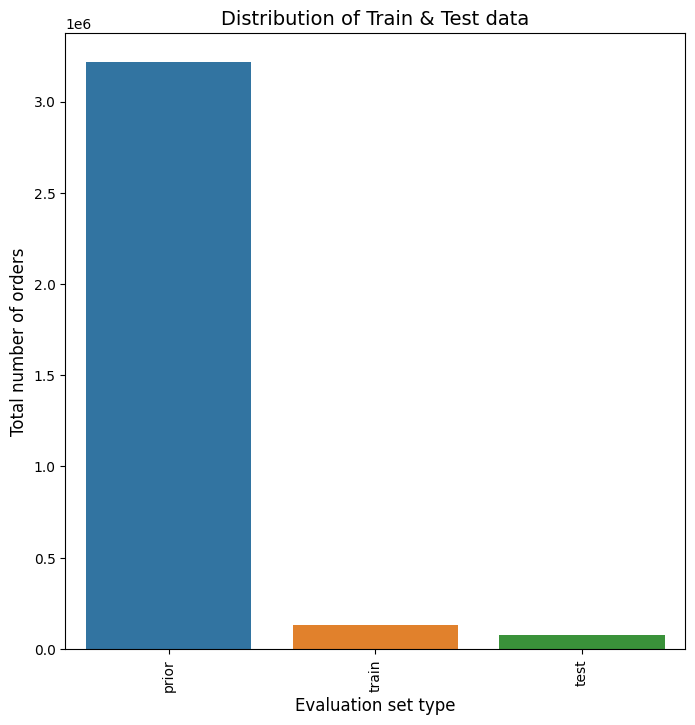

In [23]:
counts = orders['eval_set'].value_counts()
bar_plot(counts, 'Evaluation set type', 'Total number of orders', 'Distribution of Train & Test data')

In [24]:
# Percentage of data points 

print("Total train orders - ",len(orders[orders['eval_set']=='train']))
print("Percentage of train orders - ", np.round((len(orders[orders['eval_set']=='train'])/len(orders['eval_set']))*100))
print("Total test orders - ",len(orders[orders['eval_set']=='test']))
print("Percentage of test orders - ", np.round((len(orders[orders['eval_set']=='test'])/len(orders['eval_set']))*100))
print("Number of prior orders - ",len(orders[orders['eval_set']=='prior']))
print("Percentage of prior orders - ", np.round((len(orders[orders['eval_set']=='prior'])/len(orders['eval_set']))*100))

Total train orders -  131209
Percentage of train orders -  4.0
Total test orders -  75000
Percentage of test orders -  2.0
Number of prior orders -  3214874
Percentage of prior orders -  94.0


<h3>4.2 What day of the week did the majority of orders come in?

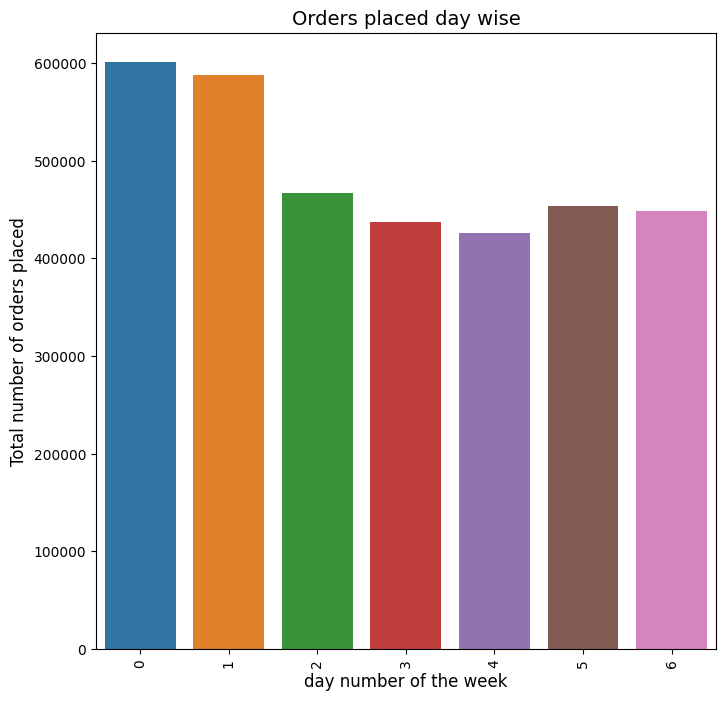

In [25]:
counts = orders['order_dow'].value_counts()
bar_plot(counts,'day number of the week','Total number of orders placed','Orders placed day wise')

<b>Observation:</b>
<li>0 - Saturday
<li>1 - Sunday
<li>2 - Monday
<li>3 - Tuesday
<li>4 - Wednesday
<li>5 - Thursday
<li>6 - Friday

The above plot shows that the majority of orders were placed on weekends, i.e. on Saturday and Sunday.
This implies that customers go shopping more on weekends.

<h3>4.3 What time of day were the majority of orders placed?

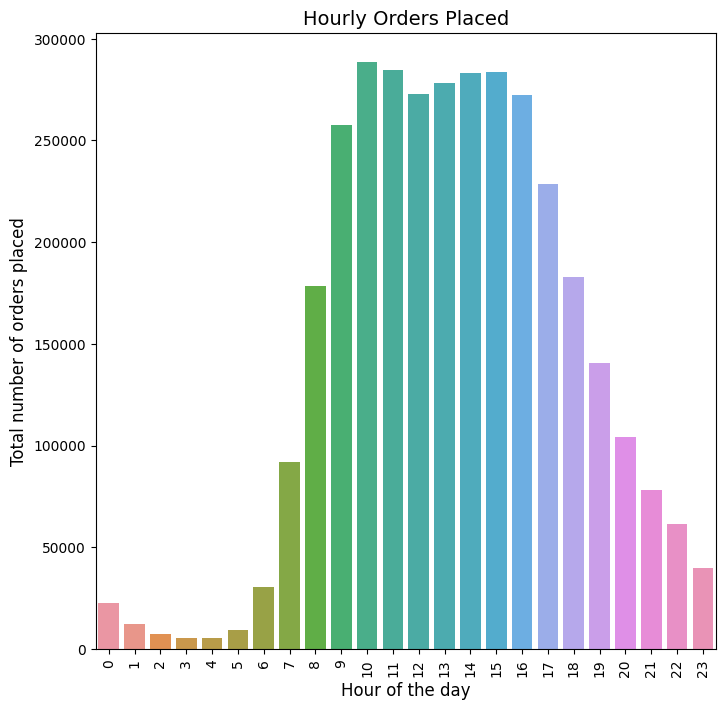

<AxesSubplot: >

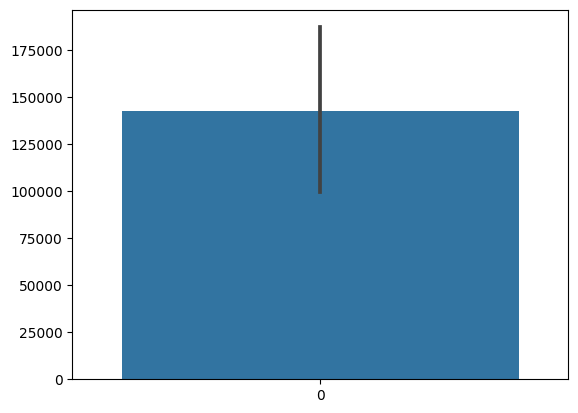

In [26]:
counts = orders['order_hour_of_day'].value_counts()
bar_plot(counts,'Hour of the day','Total number of orders placed','Hourly Orders Placed')
sns.barplot(counts)

<b>Observation:</b>
<li>The majority of the orders were placed between 9 a.m. and 5 p.m.
<li>We can see that nearly 25000 orders are placed on average during these hours.

<h3>4.4 How many days has passed between the prior order and the current order?

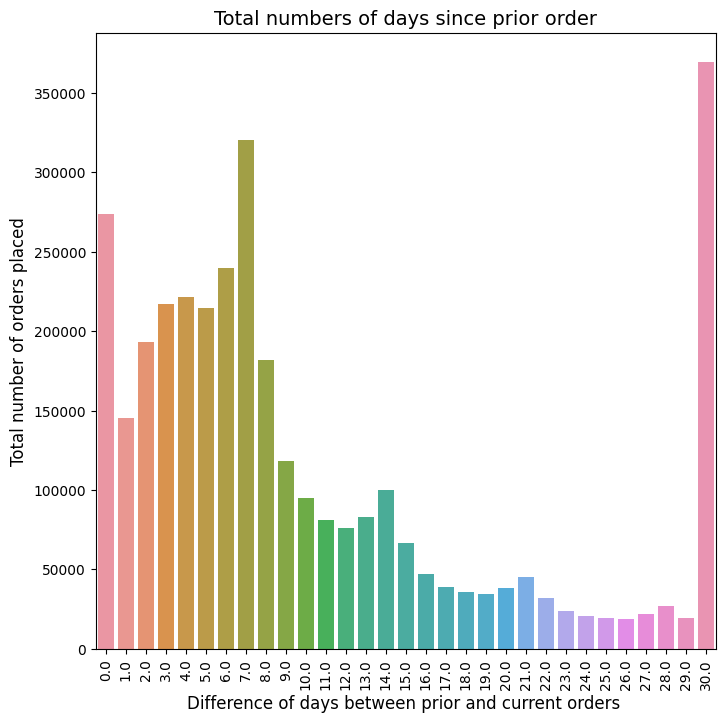

In [27]:
counts = orders['days_since_prior_order'].value_counts()
bar_plot(counts,'Difference of days between prior and current orders ','Total number of orders placed','Total numbers of days since prior order')

<b>Observation:</b>
<li>Most orders are placed after a gap of 7 days and 30 days. This indicates that customers 
    place orders or shop more frequently on weekly and monthly basis.
<li>A few orders are being placed within a one-day period.
<li>We can see that users tend to order on the first and last days of the week.
<li>During the month's end, the most orders are placed.    

<h3>4.5 What is the max orders placed by each customer?

In [28]:
print("Total number of unique customers",orders['user_id'].unique().max())

Total number of unique customers 206209


In [29]:
#The maximum order number will give us the maximum orders placed by each user
max_orders_placed = orders.groupby('user_id')['order_number'].aggregate('max')

In [30]:
max_orders_placed.head()

user_id
1    11
2    15
3    13
4     6
5     5
Name: order_number, dtype: int64

In [31]:
max_orders_placed = max_orders_placed.value_counts()
max_orders_placed.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

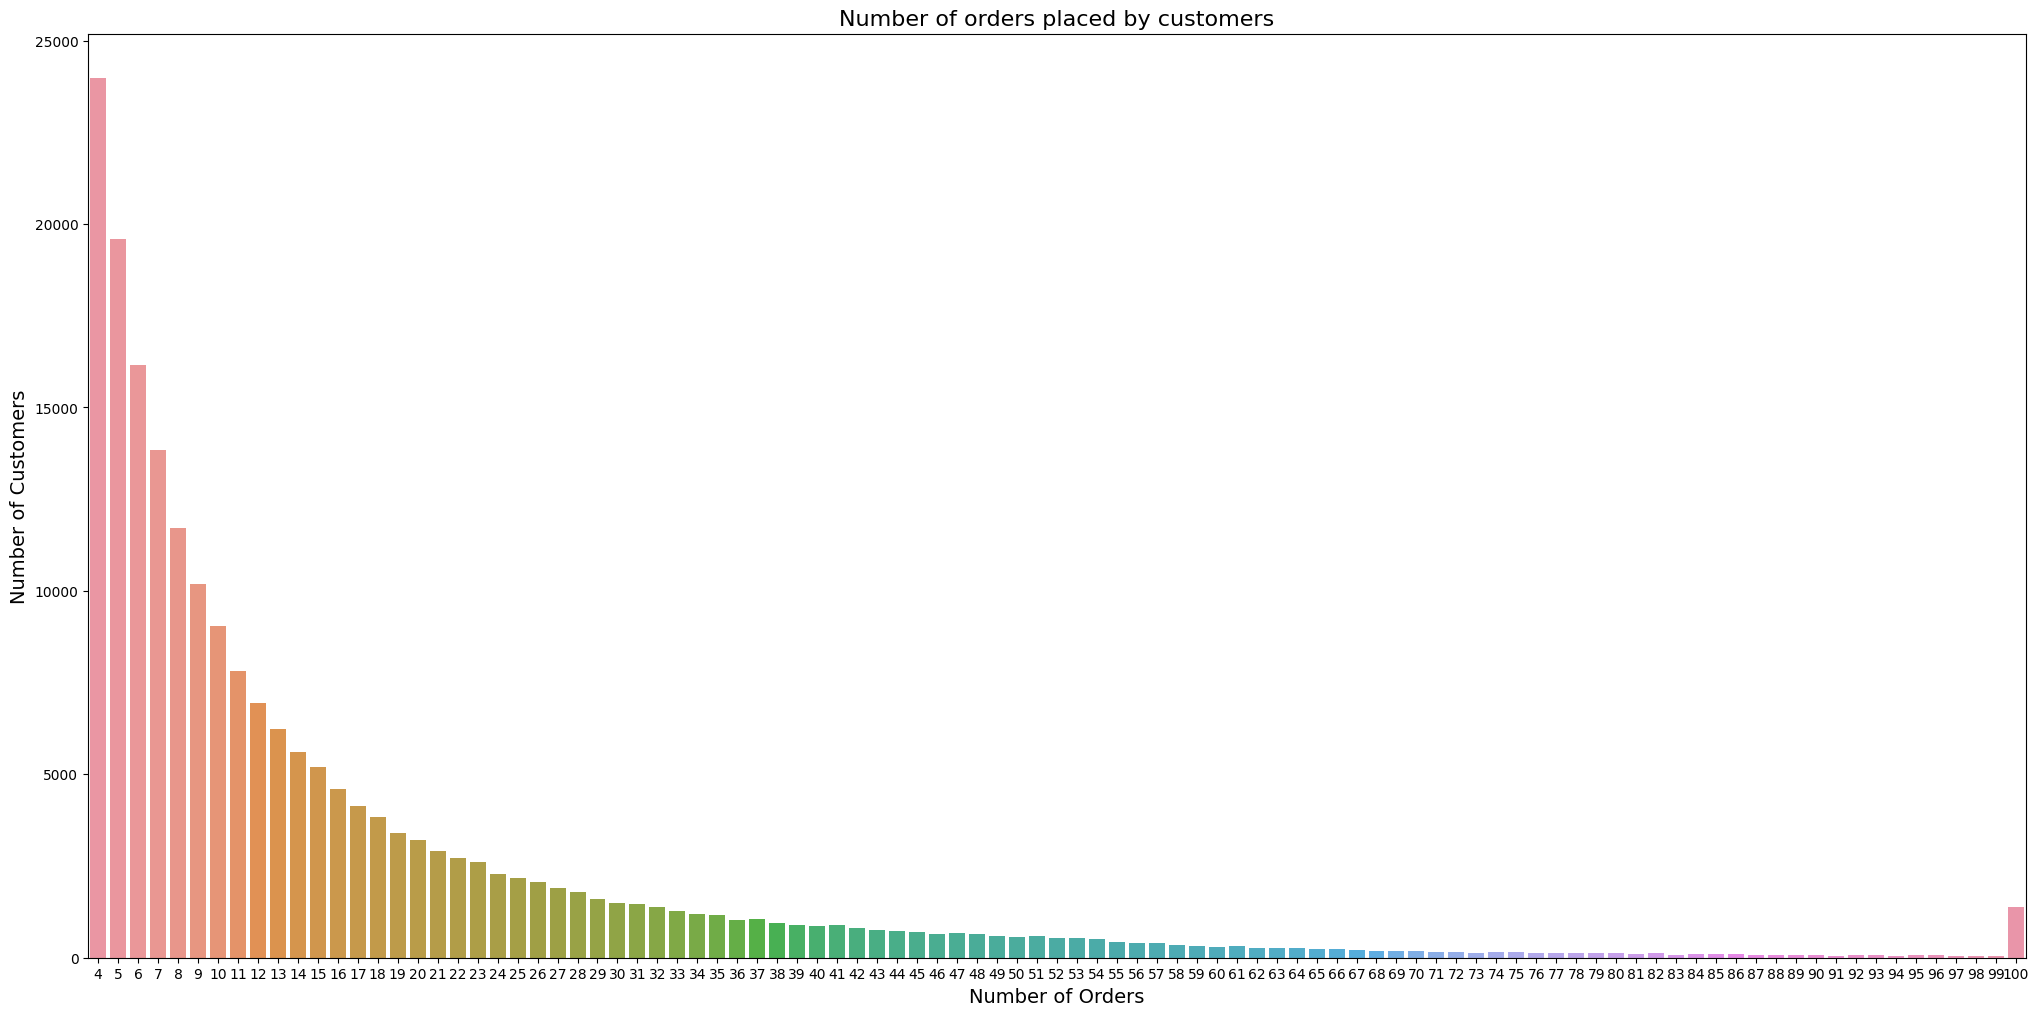

In [32]:
plt.figure(figsize=(25,12))
sns.barplot(x=max_orders_placed.index, y=max_orders_placed.values)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Number of Orders',fontsize = 14)
plt.title('Number of orders placed by customers', fontsize = 16)
plt.show()

<b>Observation:</b>
<li>The above graph is skewed, with the graph falling to the right.
<li>Most customers have placed 4 orders, precisely, around 23986 customers have placed 4 orders.
<li>Even though the graph has a negative trends, customers who have placed 100 orders outnumber those who have placed 30 to 99 orders.

<h3>4.6 Products Data

In [33]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [34]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<h3>4.7 Number of products in each department

In [35]:
prod_depart = products.merge(department, how='inner', on='department_id')

In [36]:
prod_depart.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


In [37]:
depart_count = prod_depart['department'].value_counts()

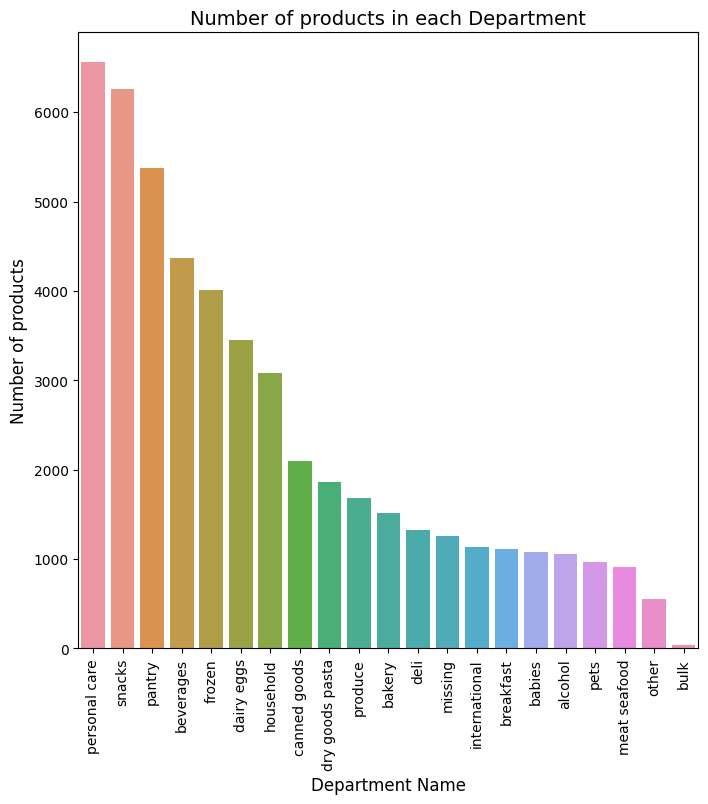

In [38]:
bar_plot(depart_count,'Department Name','Number of products','Number of products in each Department')

<b>Observation:</b>
<li>We have around 21 department types, out of which the top 5 departments are personal care, snacks, pantry, beverages and frozen.  

<h3>4.8 Number of products in each Aisle

In [39]:
prod_aisle = products.merge(aisles,  how='inner', on='aisle_id')

In [40]:
prod_aisle.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [41]:
aisle_count = prod_aisle['aisle'].value_counts()

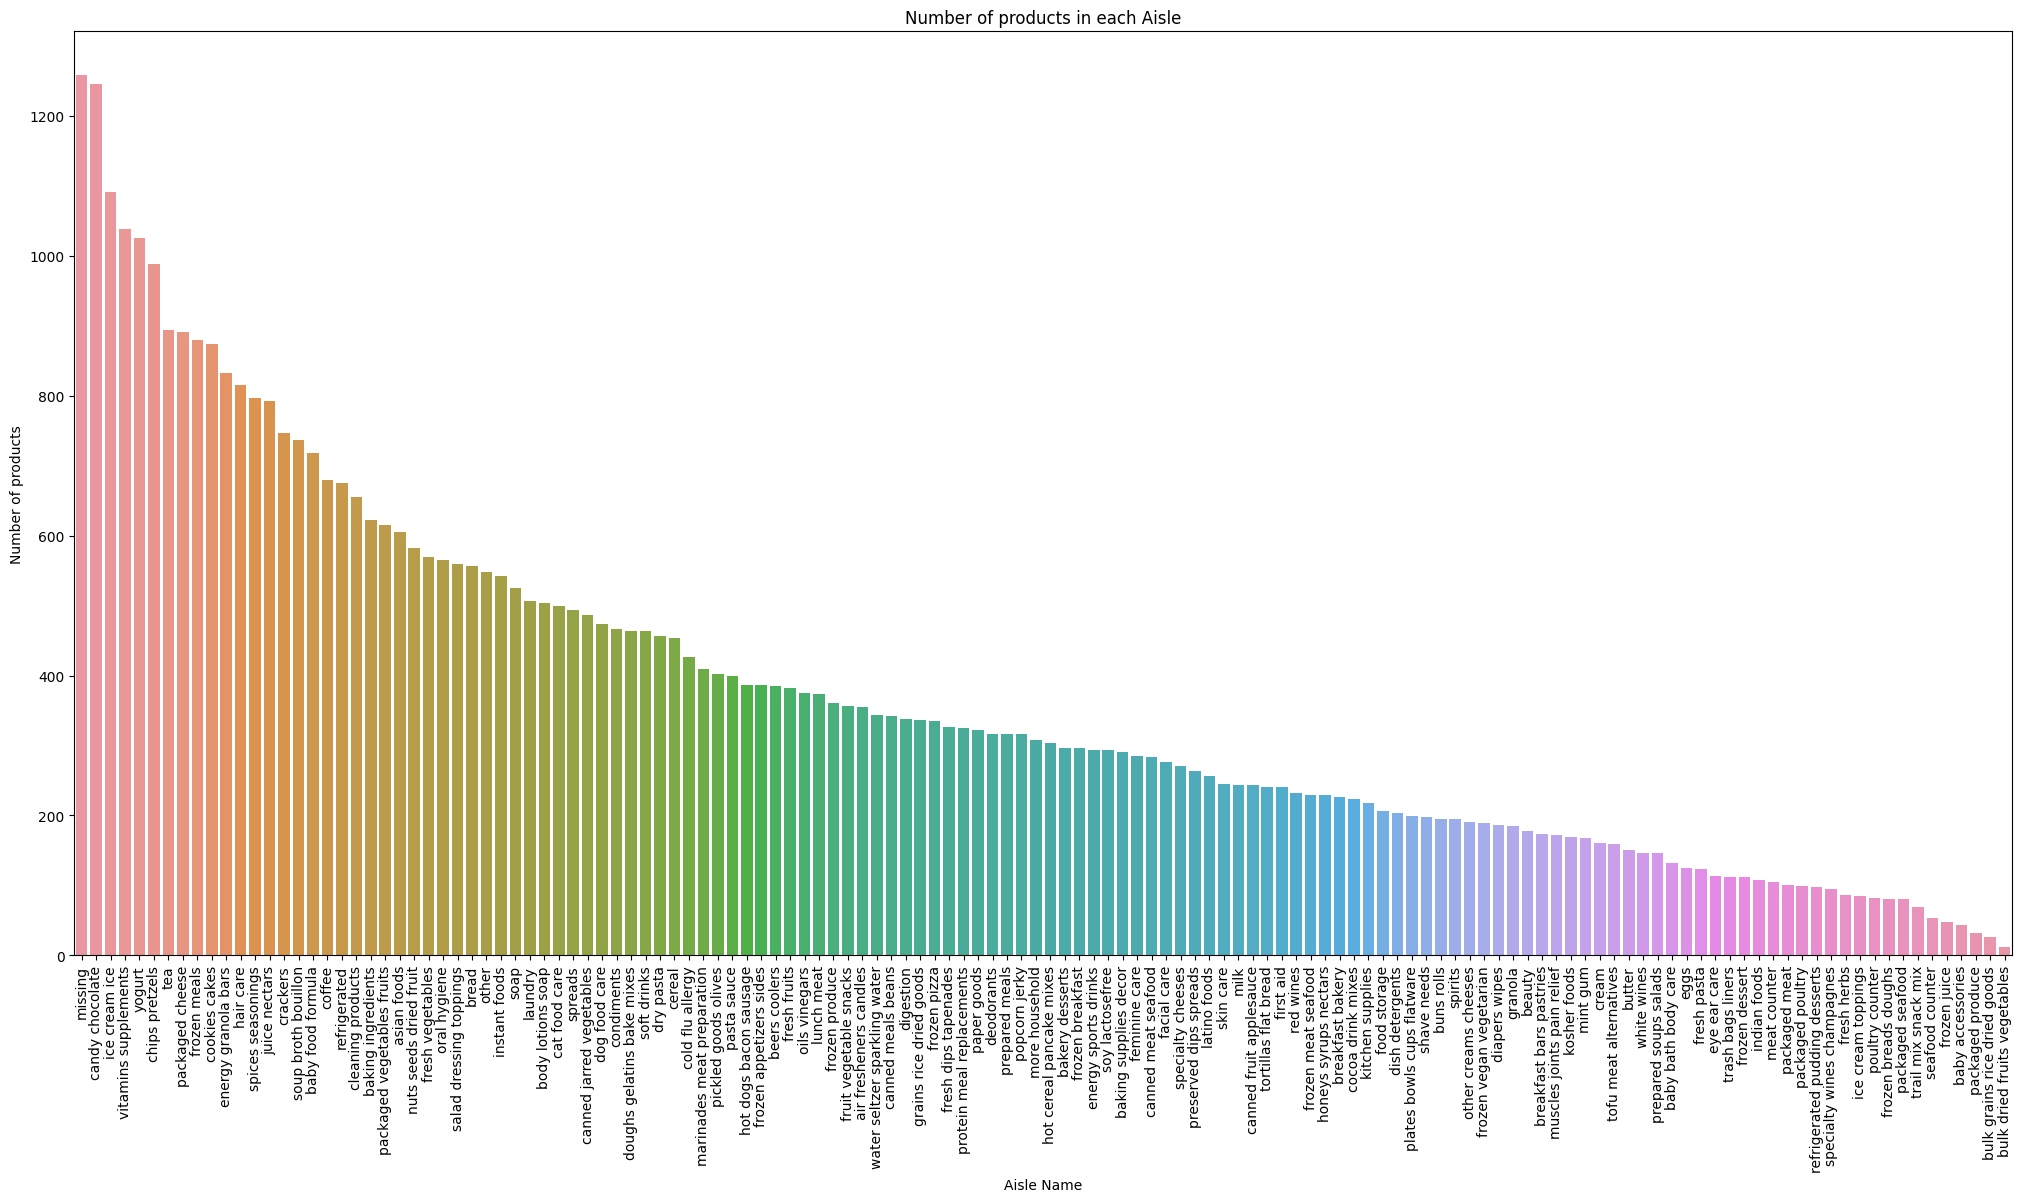

In [42]:
plt.figure(figsize=(25,12))
sns.barplot(x=aisle_count.index, y=aisle_count.values)
plt.ylabel('Number of products', fontsize = 10)
plt.xlabel('Aisle Name',fontsize = 10)
plt.title('Number of products in each Aisle', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

<b>Observation:</b>
<li>Ignoring the missing values, the top 5 aisles are Candy chocolate, Ice Cream, Vitamin Supplements, Yogurt and Chips Pretzels

<h3>4.9 Order Products Prior and Order Products Train

In [43]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [44]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


<h3> 4.10 Plots for checking reoders on prior and recent orders

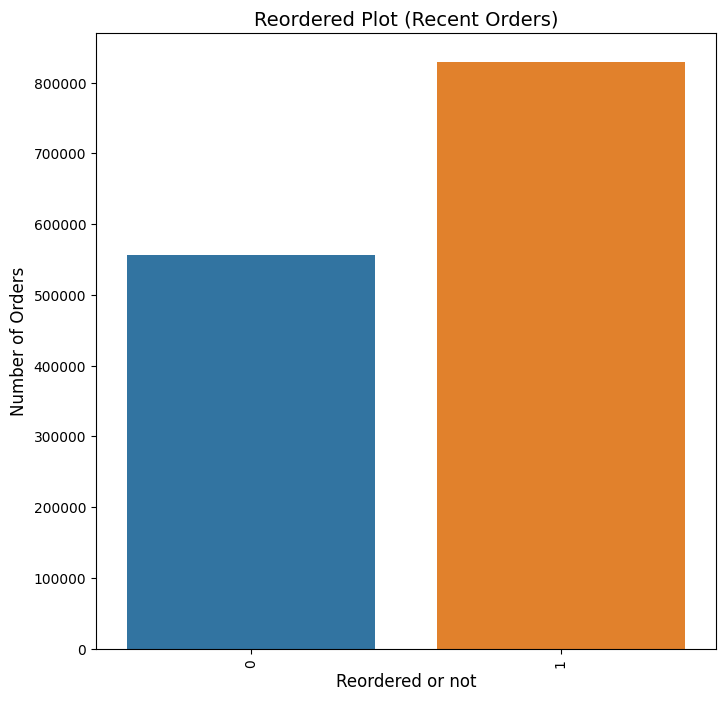

In [45]:
#Plot for checing reorder on the train orders or the recent orders
counts = order_products_train['reordered'].value_counts()
bar_plot(counts,'Reordered or not','Number of Orders','Reordered Plot (Recent Orders)')

In [46]:
# finding the percentage of reorders
print("Total number of Products ordered",len(order_products_train))
print("Total number of Reorders placed",len(order_products_train[order_products_train['reordered'] == 1]))
print("Percentage Of Reorder",len(order_products_train[order_products_train['reordered']==1])/len(order_products_train)*100)

Total number of Products ordered 1384617
Total number of Reorders placed 828824
Percentage Of Reorder 59.859441275096295


<b>Observation:</b>
<li>Nearly 59.85% of the products are reordered and 40.2% of the products are not reordered

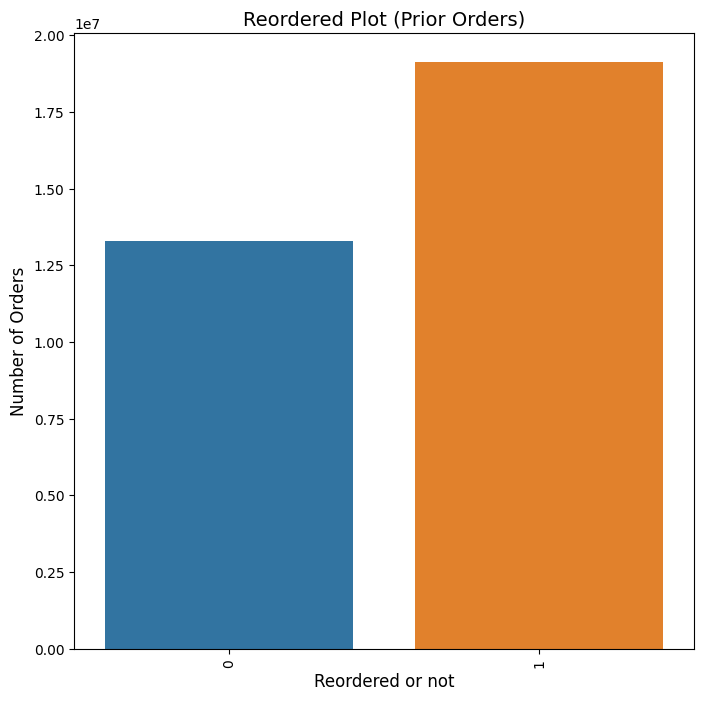

In [47]:
#Plot for checing reorder on Prior orders
counts = order_products_prior['reordered'].value_counts()
bar_plot(counts,'Reordered or not','Number of Orders','Reordered Plot (Prior Orders)')

In [48]:
# finding the percentage of reorders
print("Total number of products ordered",len(order_products_prior))
print("Total number of Reorders placed",len(order_products_prior[order_products_prior['reordered'] == 1]))
print("Percentage Of Reorders",len(order_products_prior[order_products_prior['reordered']==1])/len(order_products_prior)*100)

Total number of products ordered 32434489
Total number of Reorders placed 19126536
Percentage Of Reorders 58.969746679221615


<b>Observation:</b>
<li>Nearly 58.96% of the products are reordered and 41.04% of the products are not reordered. 
<li>Also, the percentage of products being 'reordered' and 'not reordered' are very identical foe recent orders and prior orders.    

In [49]:
#Merging the data frames with orders, products, aisles and department information
df = pd.merge(order_products_prior, products, how='left', on='product_id')
df = pd.merge(df, orders, how='left', on='order_id')
df = pd.merge(df, department, how='left', on='department_id')
df = pd.merge(df, aisles, how='left', on='aisle_id')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


<h3>Correlation Matrix

In [50]:
#Correlation matrix
df.corr()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000082,-0.000320,-0.000253,-0.000063,-0.000229,-0.000482,-0.000543,0.001205,0.000652,0.000656
product_id,-0.000082,1.000000,0.005529,0.003718,0.002254,-0.028503,0.000080,-0.001925,-0.002350,0.000942,0.000563
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024,0.009451,0.029437,0.000729,-0.004228,-0.009071,-0.014805,0.050260
reordered,-0.000253,0.003718,-0.133024,1.000000,0.003924,-0.039371,-0.000862,0.306840,-0.006949,-0.023300,-0.024465
aisle_id,-0.000063,0.002254,0.009451,0.003924,1.000000,0.062203,-0.000114,-0.000293,-0.001997,-0.001134,0.005357
department_id,-0.000229,-0.028503,0.029437,-0.039371,0.062203,1.000000,0.000056,0.000529,0.004398,-0.008837,0.000937
user_id,-0.000482,0.000080,0.000729,-0.000862,-0.000114,0.000056,1.000000,-0.000768,-0.001630,-0.000415,0.000448
order_number,-0.000543,-0.001925,-0.004228,0.306840,-0.000293,0.000529,-0.000768,1.000000,0.015209,-0.040049,-0.257864
order_dow,0.001205,-0.002350,-0.009071,-0.006949,-0.001997,0.004398,-0.001630,0.015209,1.000000,0.012176,-0.026520
order_hour_of_day,0.000652,0.000942,-0.014805,-0.023300,-0.001134,-0.008837,-0.000415,-0.040049,0.012176,1.000000,-0.000195


In [51]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000082,-0.000320,-0.000253,-0.000063,-0.000229,-0.000482,-0.000543,0.001205,0.000652,0.000656
product_id,-0.000082,1.000000,0.005529,0.003718,0.002254,-0.028503,0.000080,-0.001925,-0.002350,0.000942,0.000563
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024,0.009451,0.029437,0.000729,-0.004228,-0.009071,-0.014805,0.050260
reordered,-0.000253,0.003718,-0.133024,1.000000,0.003924,-0.039371,-0.000862,0.306840,-0.006949,-0.023300,-0.024465
aisle_id,-0.000063,0.002254,0.009451,0.003924,1.000000,0.062203,-0.000114,-0.000293,-0.001997,-0.001134,0.005357
department_id,-0.000229,-0.028503,0.029437,-0.039371,0.062203,1.000000,0.000056,0.000529,0.004398,-0.008837,0.000937
user_id,-0.000482,0.000080,0.000729,-0.000862,-0.000114,0.000056,1.000000,-0.000768,-0.001630,-0.000415,0.000448
order_number,-0.000543,-0.001925,-0.004228,0.306840,-0.000293,0.000529,-0.000768,1.000000,0.015209,-0.040049,-0.257864
order_dow,0.001205,-0.002350,-0.009071,-0.006949,-0.001997,0.004398,-0.001630,0.015209,1.000000,0.012176,-0.026520
order_hour_of_day,0.000652,0.000942,-0.014805,-0.023300,-0.001134,-0.008837,-0.000415,-0.040049,0.012176,1.000000,-0.000195


<b>Observation:</b>
<li>add_to_cart_order has a negative corelation with reordered. Hence, when add_to_cart_order decreases the the probability of product being reordered increases.
<li>order_number has a positive corelation with reordered. when order_number increases, probability of it containing products to be reordered increases as well.
<li>order_number has a negative corelation with days_since_prior_order. This is obvious because more the gap between orders being placed less is the number of orders placed.

<h3>4.11 Best Selling Department (in terms of number of orders)

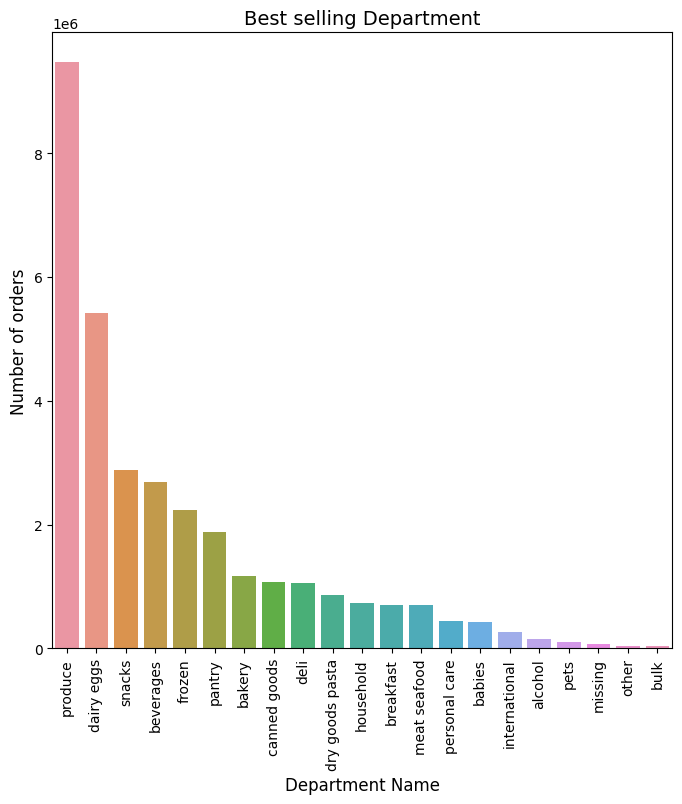

In [53]:
counts = df['department'].value_counts()
bar_plot(counts,'Department Name','Number of orders','Best selling Department')

<b>Observation:</b>
<li>The top 5 best selling departments are produce, dairy eggs, snacks, beverages and frozen.
<li>We don't have any data on revenue generated by department, so we can't say which department is the most profitable; we can only say which department has the most orders.

<h3> But what exactly is the "produce" department? Let's break it down by aisle.

In [54]:
produce_depart = df[df['department'] == 'produce']
produce_depart['aisle'].value_counts()

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
fresh herbs                    377741
packaged produce               276028
Name: aisle, dtype: int64

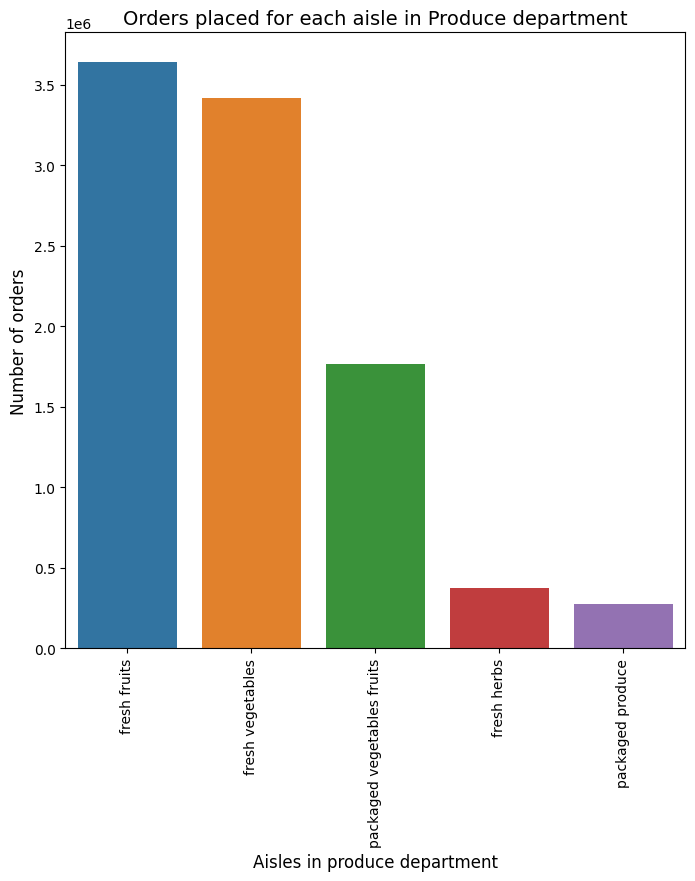

In [55]:
counts = produce_depart['aisle'].value_counts()
bar_plot(counts,'Aisles in produce department','Number of orders','Orders placed for each aisle in Produce department')

<b>Observation:</b>
<li>The Produce department further contains the following aisles: fresh fruits, fresh vegetables, packaged vegetables fruits and fresh herbs.
<li>In the Produce department most orders are placed for fresh fruits and least for packaged products.
<li>The fresh vegetables aisle is not far behind. This would also indicate that the majority of customers who order here appear to be diet-conscious and prefer healthy products to beverages, packaged goods, snacks, and so on.

<h3>4.12 Best Selling Aisle (Overall)

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
Name: aisle, dtype: int64


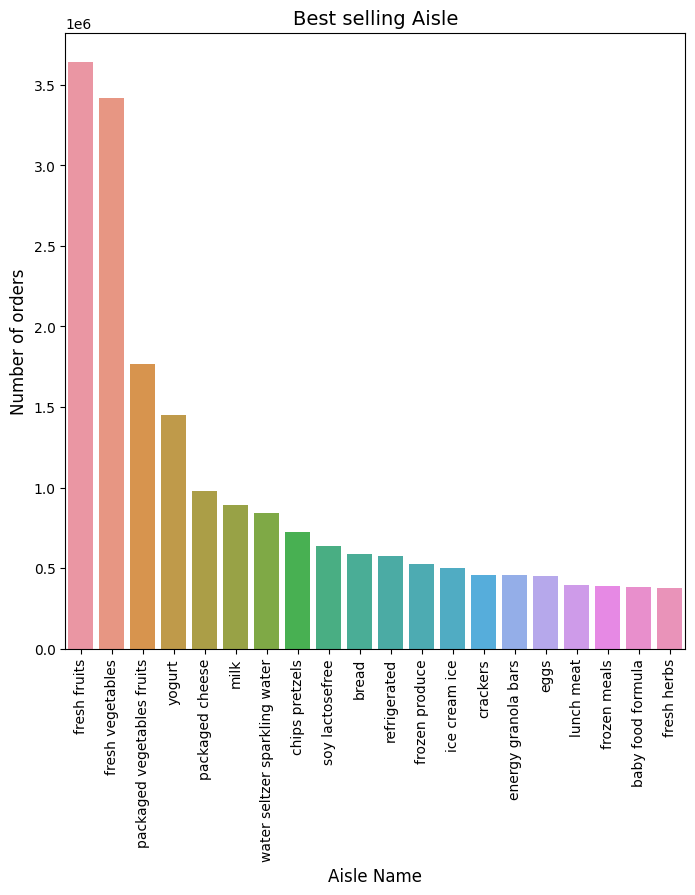

In [56]:
counts = df['aisle'].value_counts()[:20]
print(counts.head())
bar_plot(counts,'Aisle Name','Number of orders','Best selling Aisle')

<b>Observation:</b>
<li>Most orders are placed for fresh fruits, fresh vegetables and packaged vegetables fruits.

<h3>4.13 Which Products Were the Most Popular?

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Name: product_name, dtype: int64


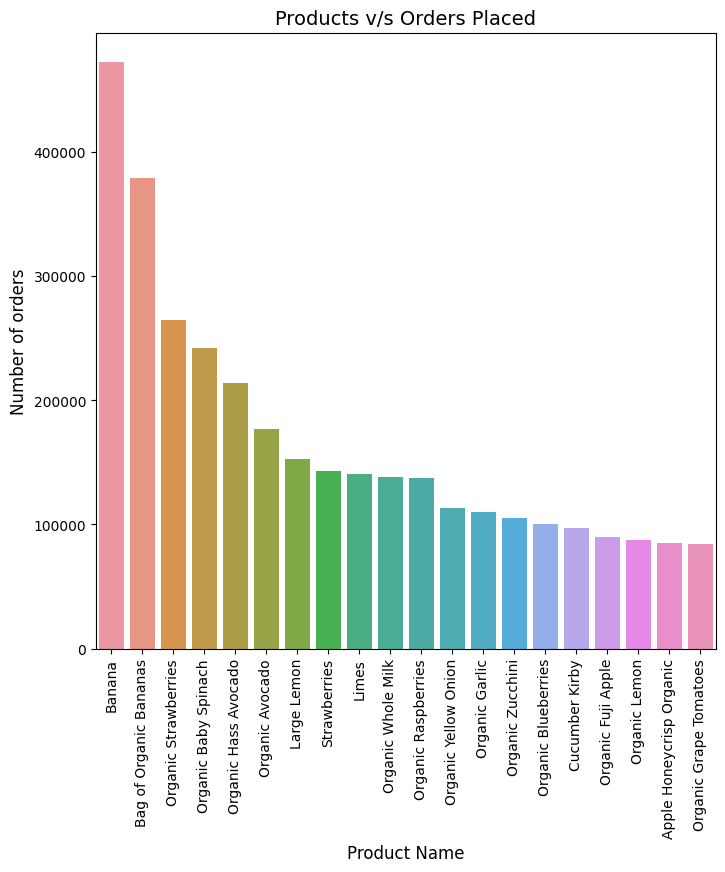

In [57]:
counts = df['product_name'].value_counts()[:20]
print(counts.head())
bar_plot(counts,'Product Name','Number of orders','Products v/s Orders Placed')

<b>Observation:</b>
<li>We had already determined that the majority of orders were placed for fruits and vegetables from the produce department. As expected, fruits like bananas, avocados, and spinach are the most popular.

<h3> Let's take a look at the most frequently reordered products.

Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Name: product_name, dtype: int64


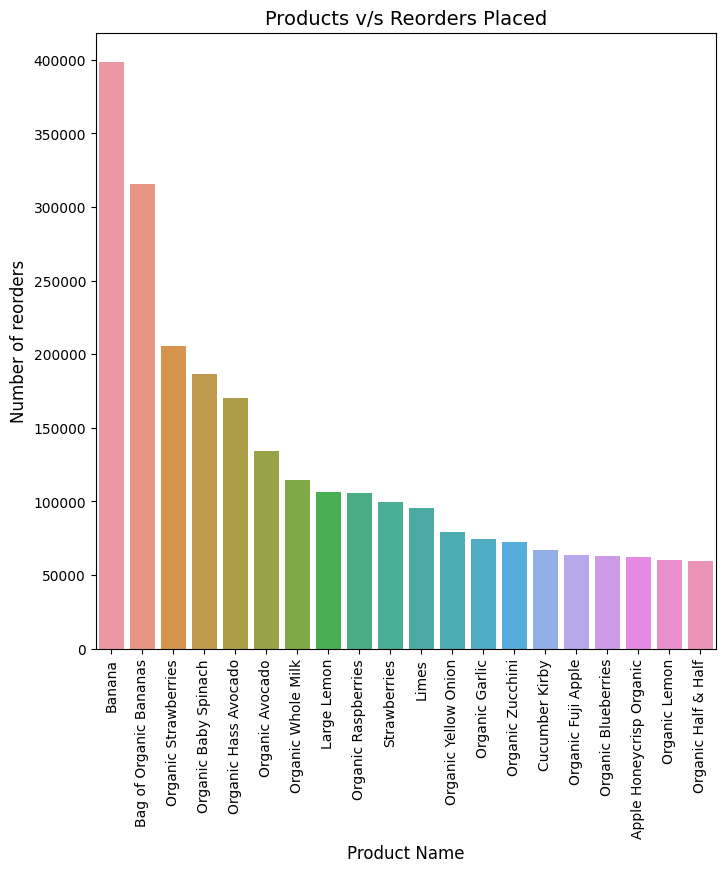

In [58]:
counts = df[df['reordered'] == 1]['product_name'].value_counts()[:20]
print(counts.head())
bar_plot(counts,'Product Name','Number of reorders','Products v/s Reorders Placed')

<AxesSubplot: xlabel='product_name,reordered', ylabel='Number of times reordered'>

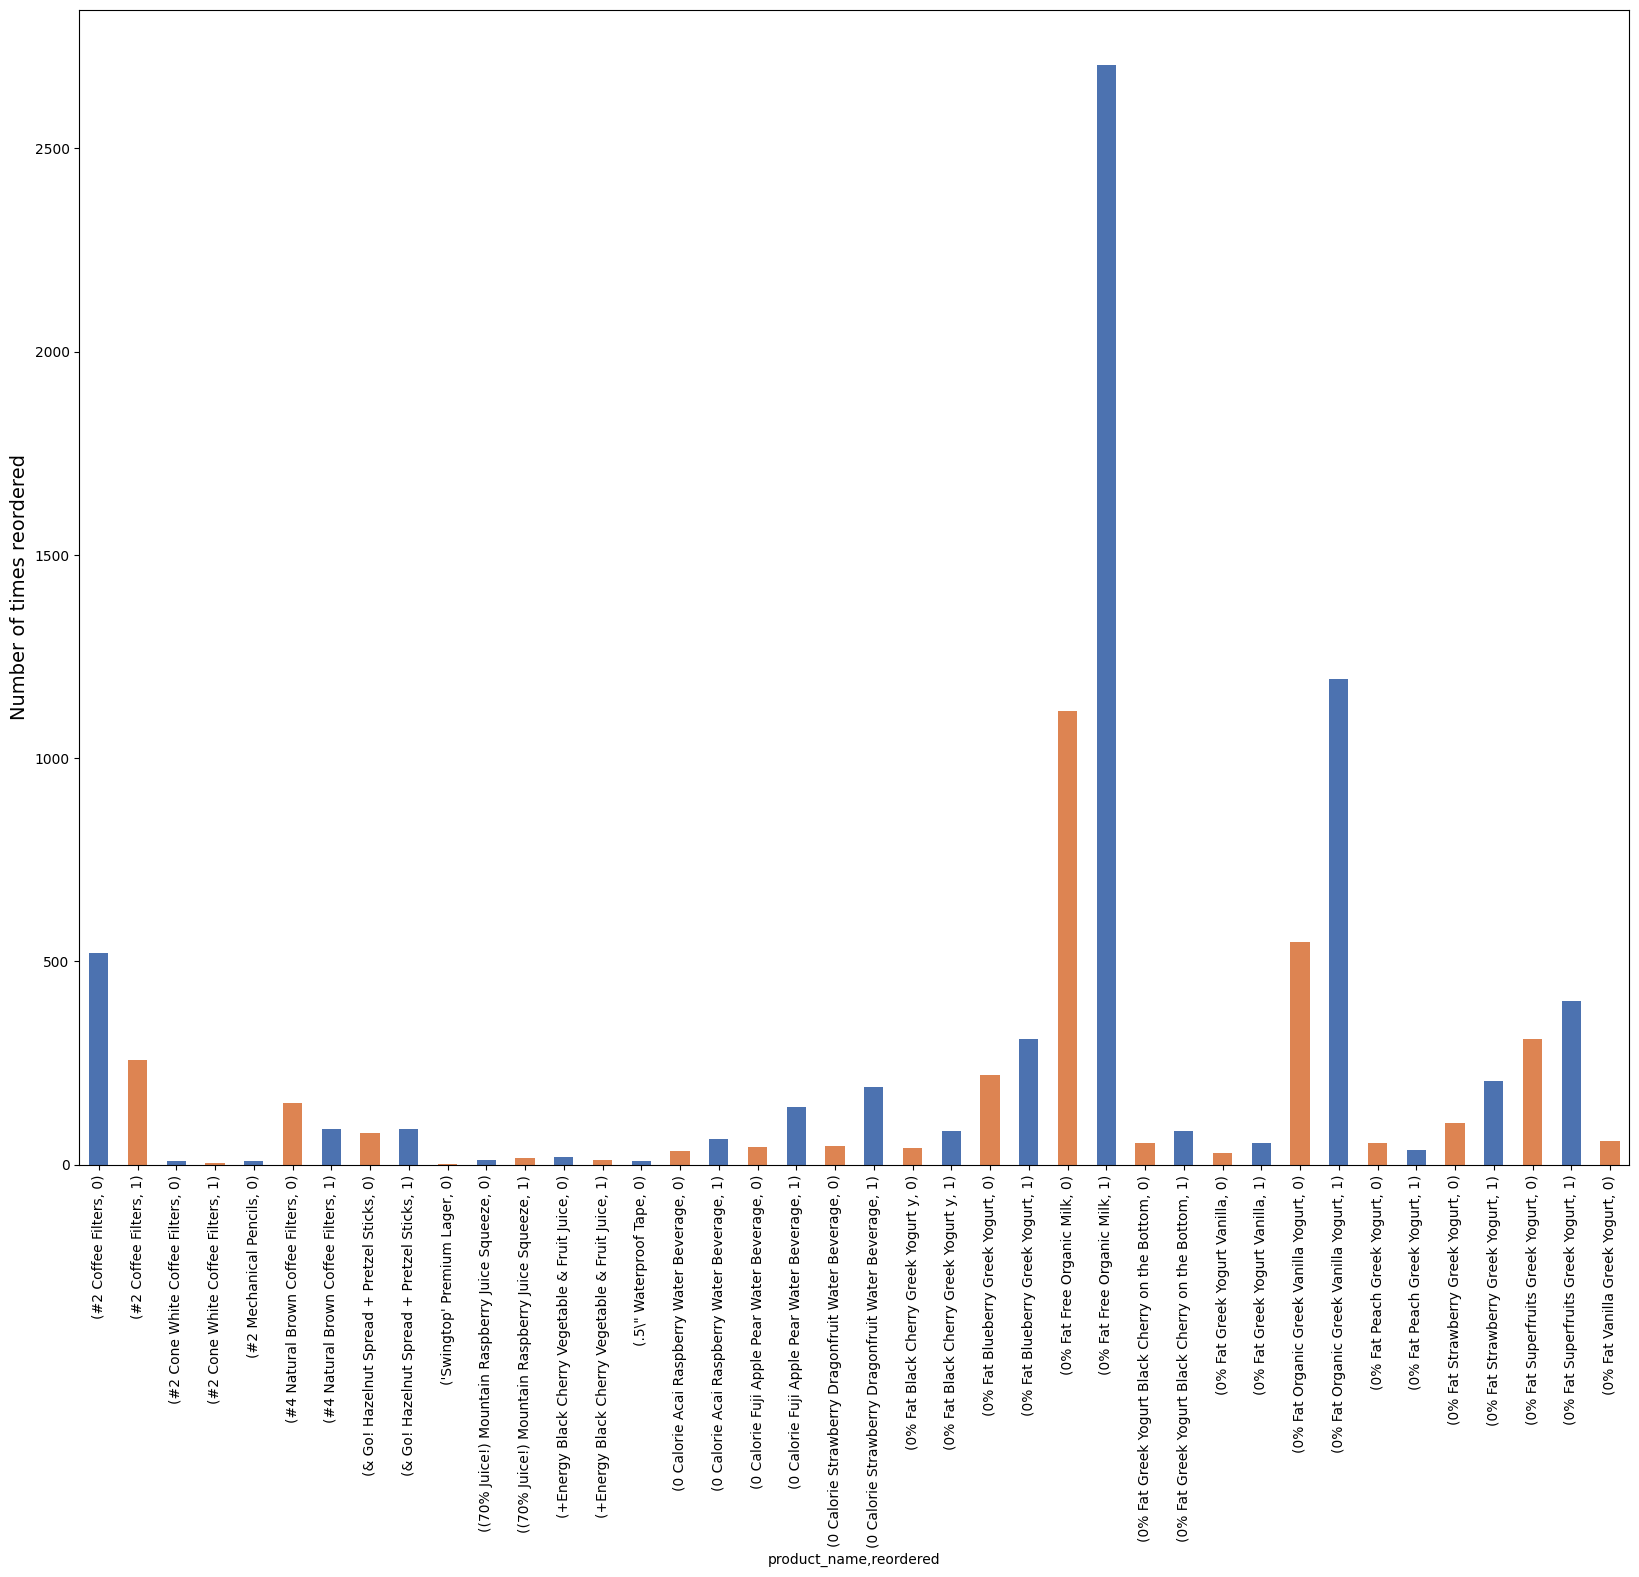

In [63]:
plt.figure(figsize=(20,15))
groups = df.groupby(['product_name','reordered']).size()
groups = groups[:40]
plt.ylabel('Number of times reordered', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observation:</b>
<li>This is similar to the previous finding, but this plot shows precisely how many times each of the top 20 products has been reordered. Banana is still the most popular, with 400000 reorders.

<h3>4.14 Reorder v/s Day Of The Week

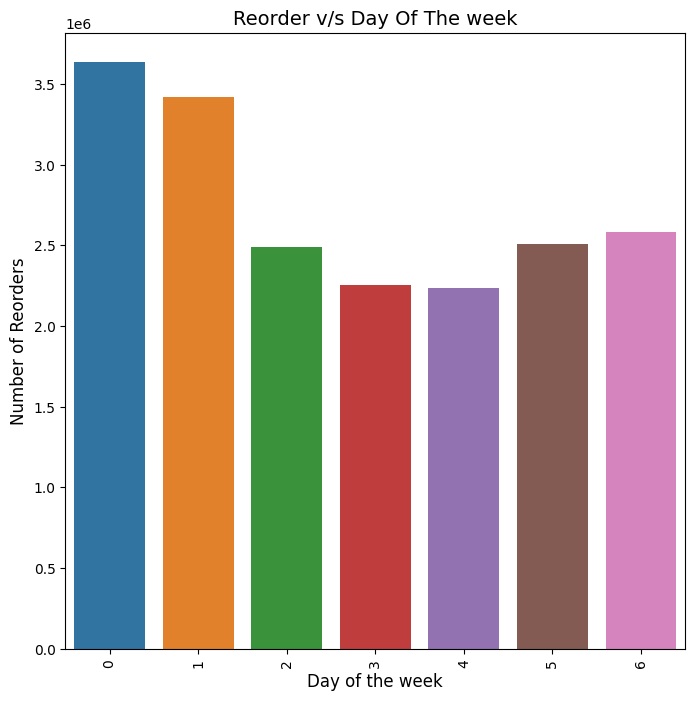

In [64]:
counts = df[df['reordered'] == 1]['order_dow'].value_counts()
bar_plot(counts,'Day of the week','Number of Reorders','Reorder v/s Day Of The week')

<AxesSubplot: xlabel='order_dow,reordered', ylabel='Number Of Reorders'>

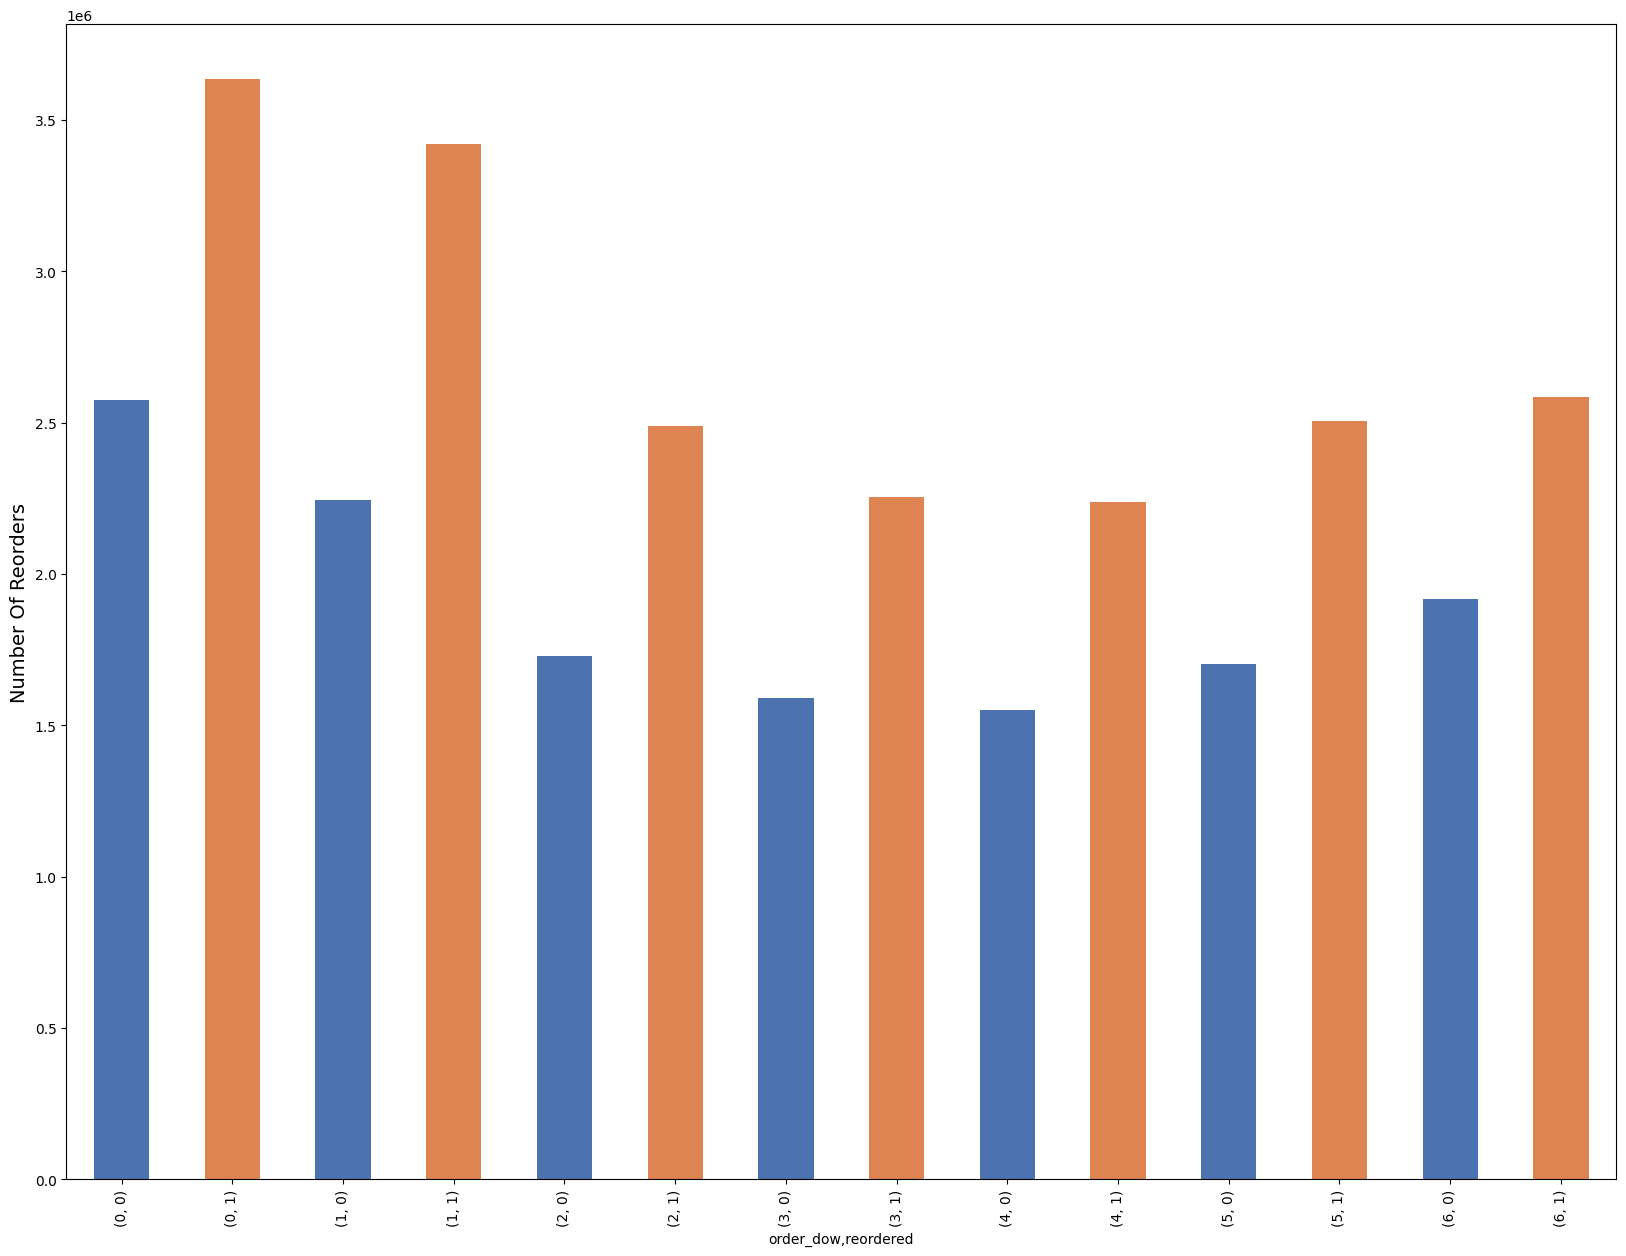

In [65]:
plt.figure(figsize=(20,15))
groups = df.groupby(['order_dow','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observation:</b>
<li>Most reorders occurs on a Saturday.
<li>Least reorders occurs on a Wednesday.

<h3>4.15 Reorder v/s Hour Of The Day

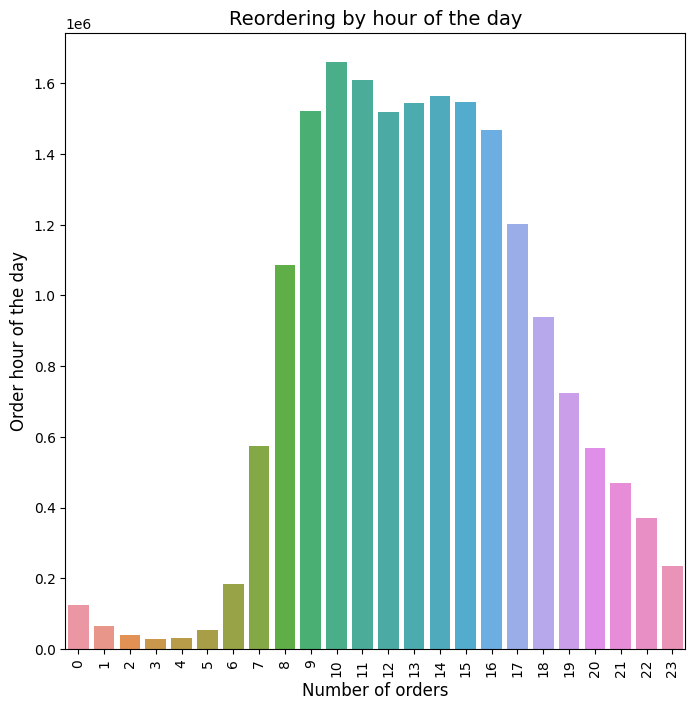

In [66]:
counts = df[df['reordered']==1]['order_hour_of_day'].value_counts()
bar_plot(counts, 'Number of orders', 'Order hour of the day', 'Reordering by hour of the day')

<AxesSubplot: xlabel='order_hour_of_day,reordered', ylabel='Number Of Reorders'>

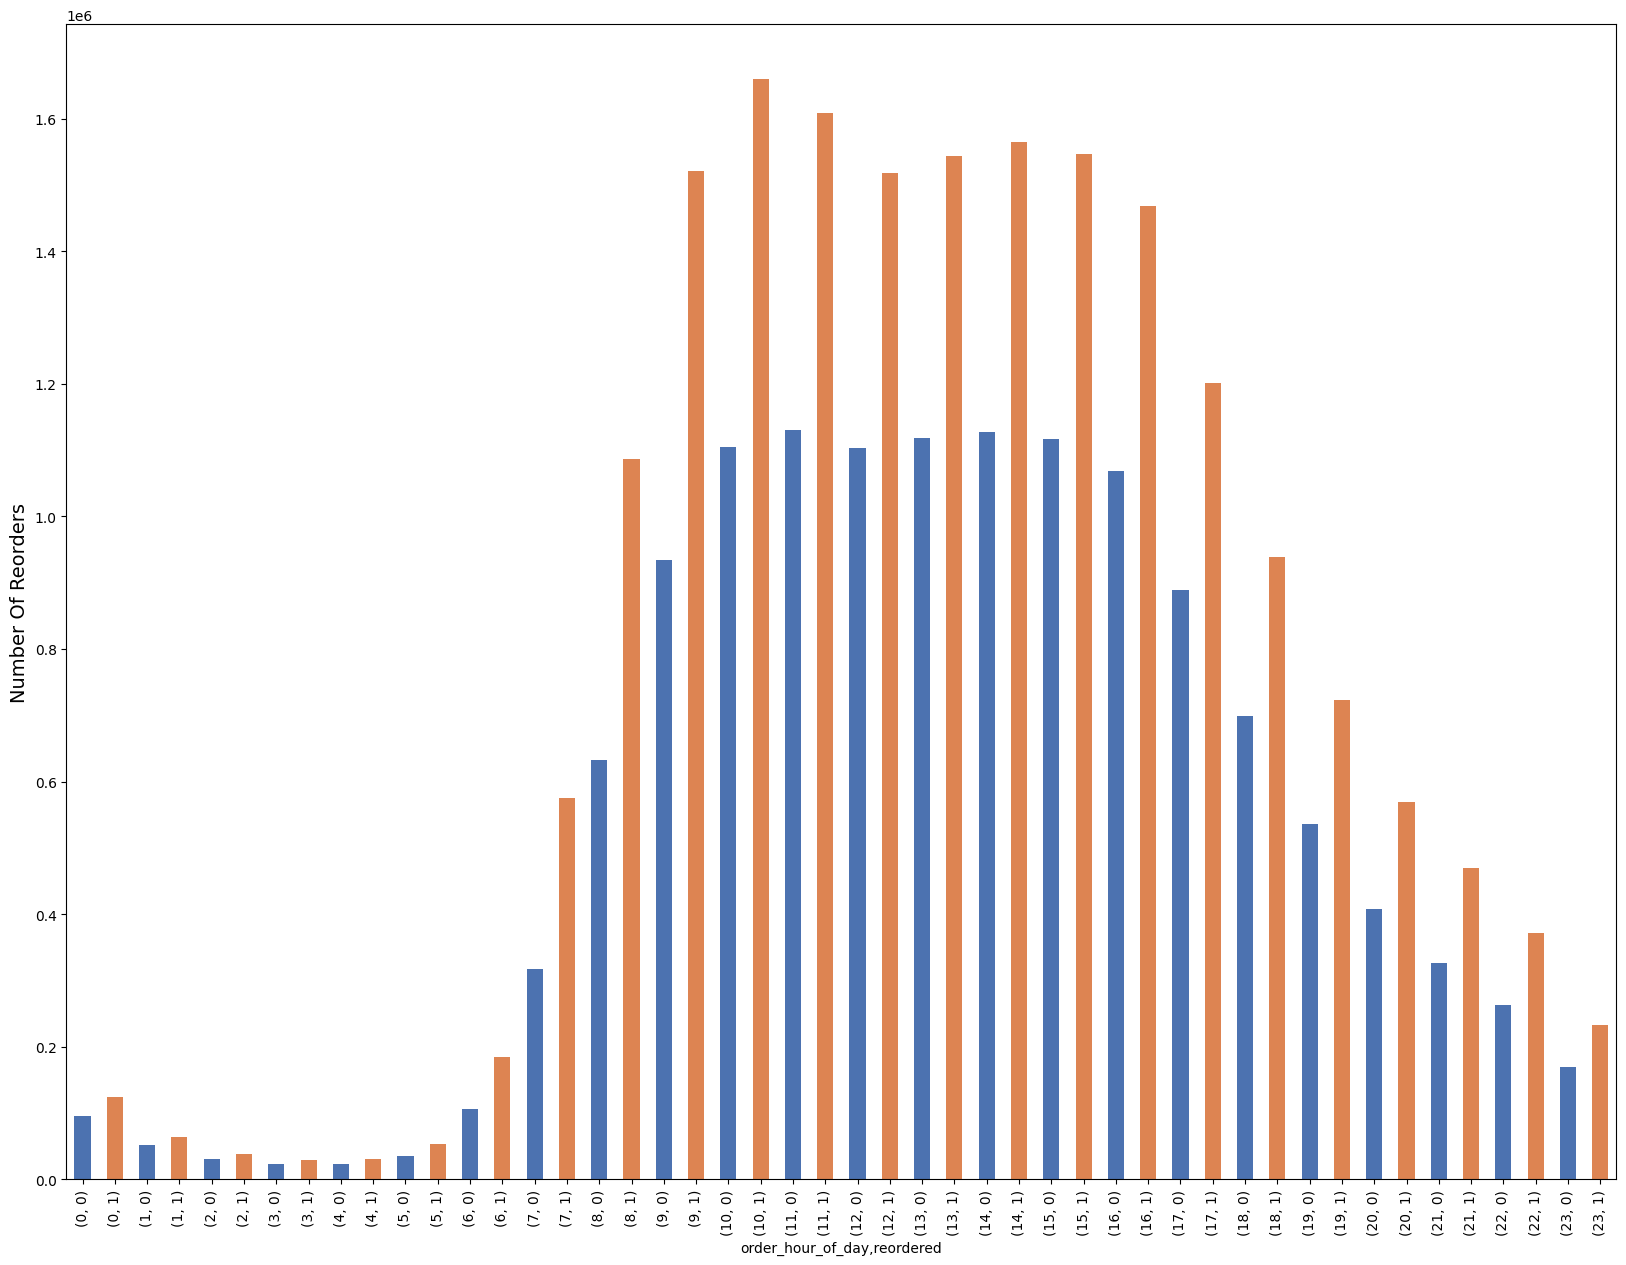

In [67]:
plt.figure(figsize=(20,15))
groups = df.groupby(['order_hour_of_day','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observation:</b>
<li>Maximum reorders occure at around 9 a.m.
<li>Reorder rate is high between 8 a.m and 9 p.m.
<li>Reorder rate is least during 1 a.m and 5 a.m.   

<h3>4.16 Reorder v/s Add To Cart Order

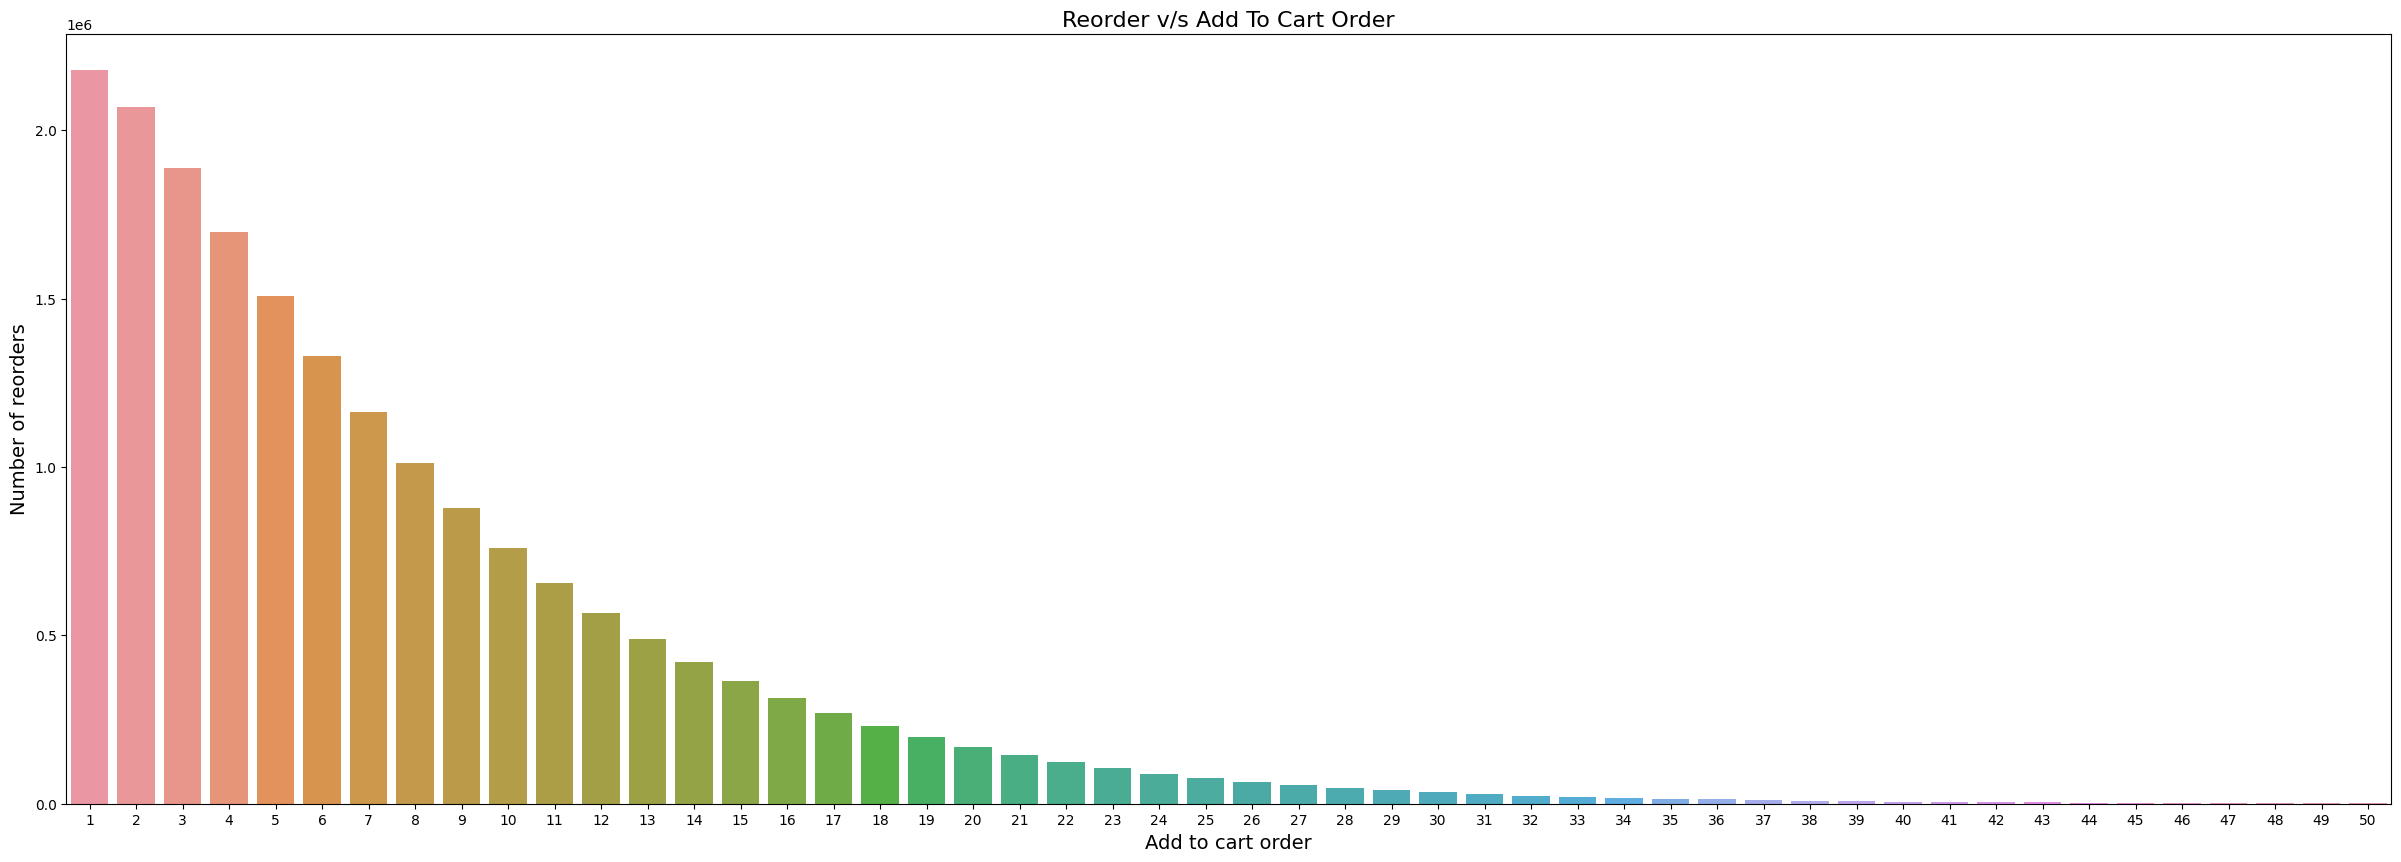

In [68]:
counts = df[df['reordered'] == 1]['add_to_cart_order'].value_counts()[:50]
plt.figure(figsize=(30,10))
sns.barplot(x=counts.index, y=counts.values)
plt.ylabel('Number of reorders', fontsize = 14)
plt.xlabel('Add to cart order',fontsize = 14)
plt.title('Reorder v/s Add To Cart Order', fontsize = 16)
plt.show()

<b>Observations:</b>
<li>The above plot clearly tells that number_of_reorders has negatively correlation with add_to_cart. As number of items increases under add_to_cart, their chances of being reordered dcreases.

<h3>4.17 Reorder v/s Days Since Prior Order

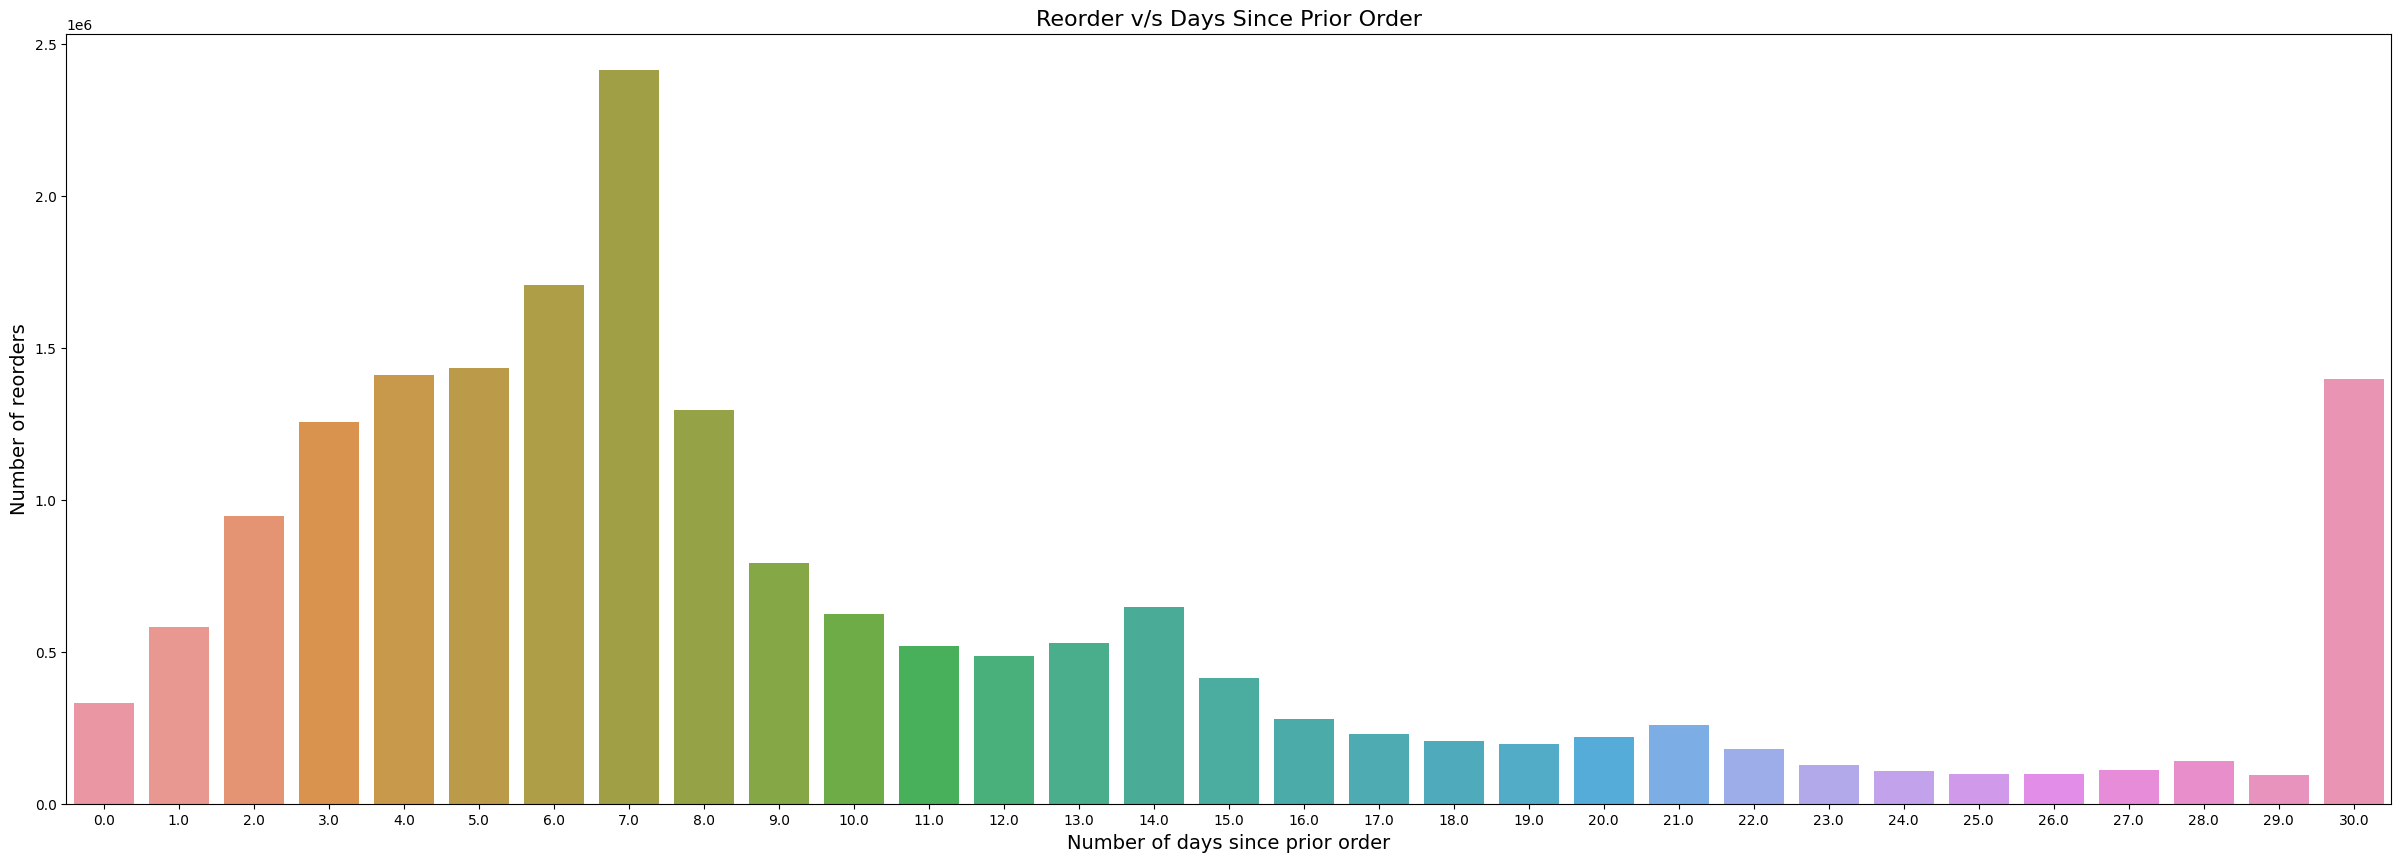

In [69]:
counts = df[df['reordered'] == 1]['days_since_prior_order'].value_counts()
plt.figure(figsize=(30,10))
sns.barplot(x=counts.index, y=counts.values)
plt.ylabel('Number of reorders', fontsize = 14)
plt.xlabel('Number of days since prior order',fontsize = 14)
plt.title('Reorder v/s Days Since Prior Order', fontsize = 16)
plt.show()

<AxesSubplot: xlabel='days_since_prior_order,reordered', ylabel='Number Of Reorders'>

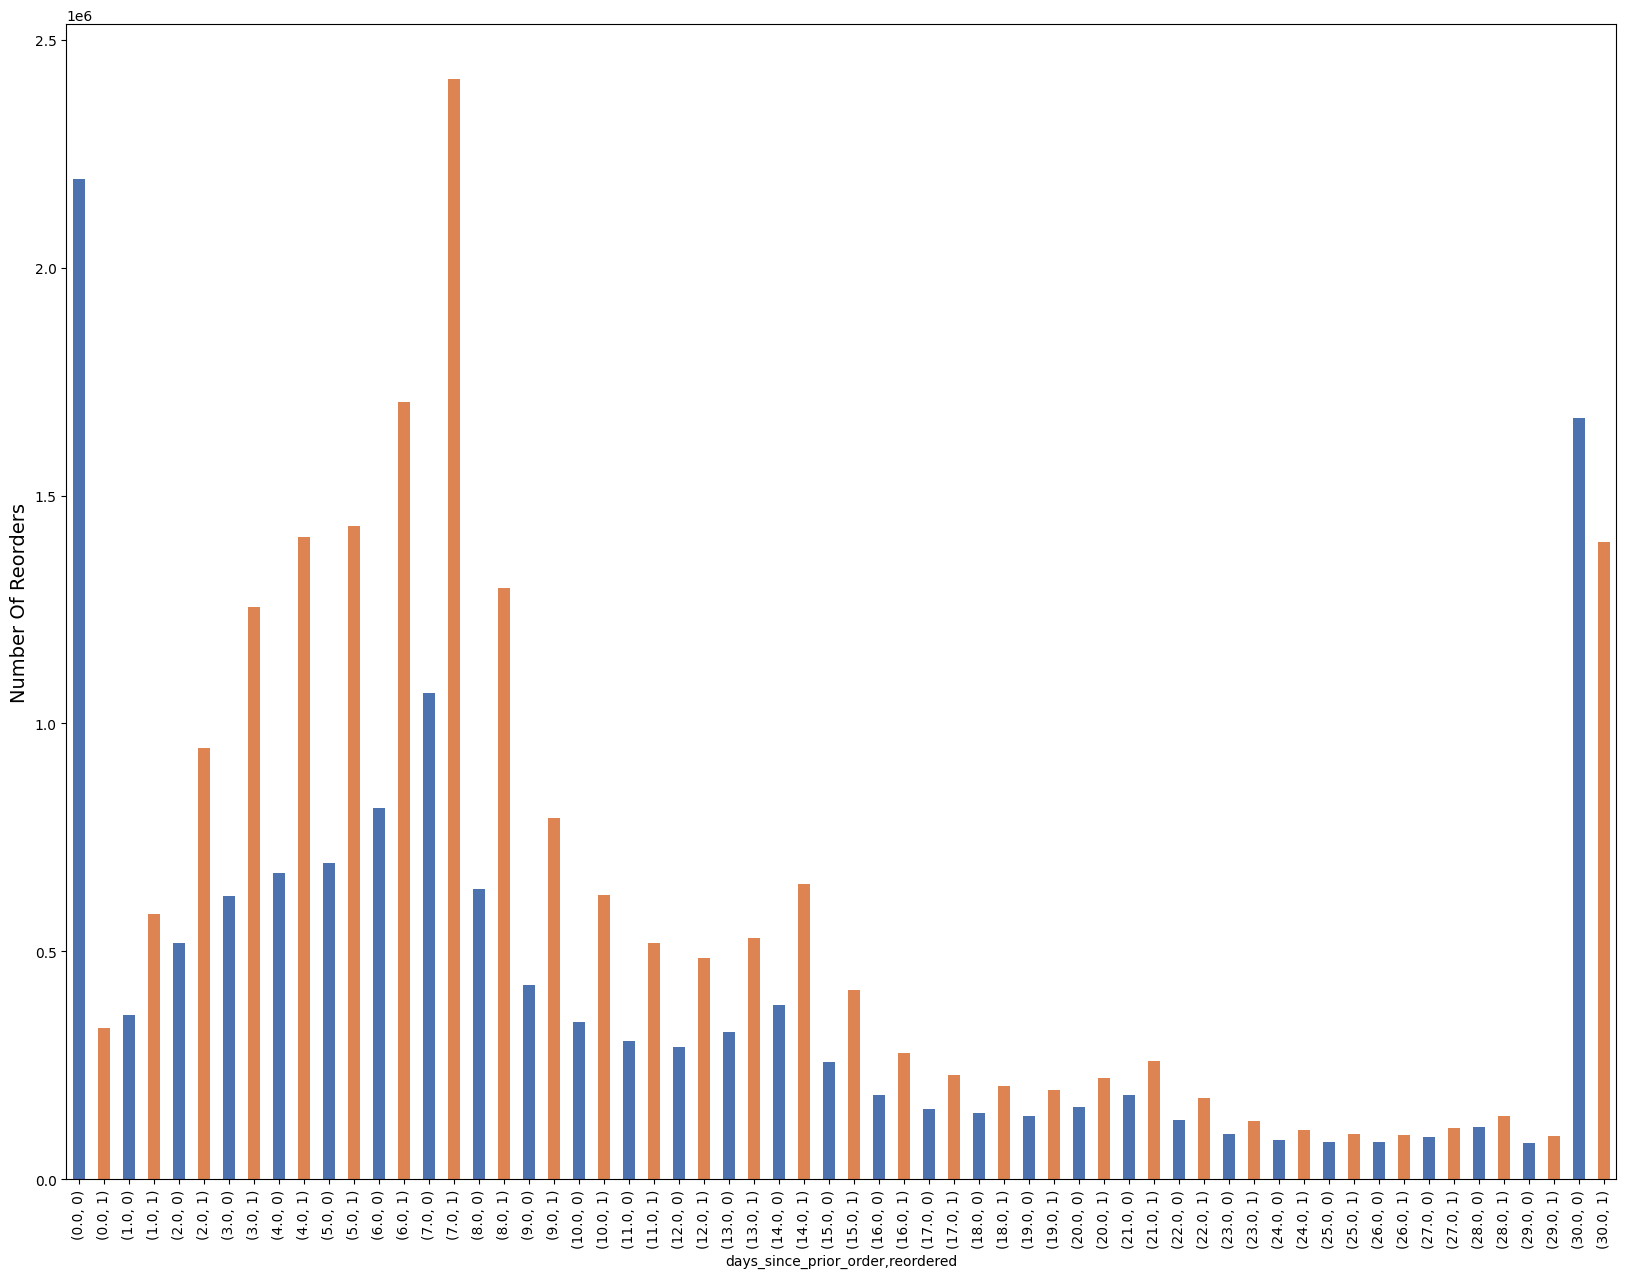

In [70]:
plt.figure(figsize=(20,15))
groups = df.groupby(['days_since_prior_order','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
# groups = groups[:40]
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observation:</b>
<li>We can clearly say that maximum number of reorders are done after a gap of 7 days.
<li>Majority of reorders are made after a gap of 5 to 7 days and after 30 days.
<li>Least number of reorders are made during a gap of 15 to 29 days that is somewhere during the mid-week.
<li>Thus, majority of the reorders are made either during weekend or monthend.    

<h3>4.18 Which department receives the most reorders? (Reorders v/s Departments)

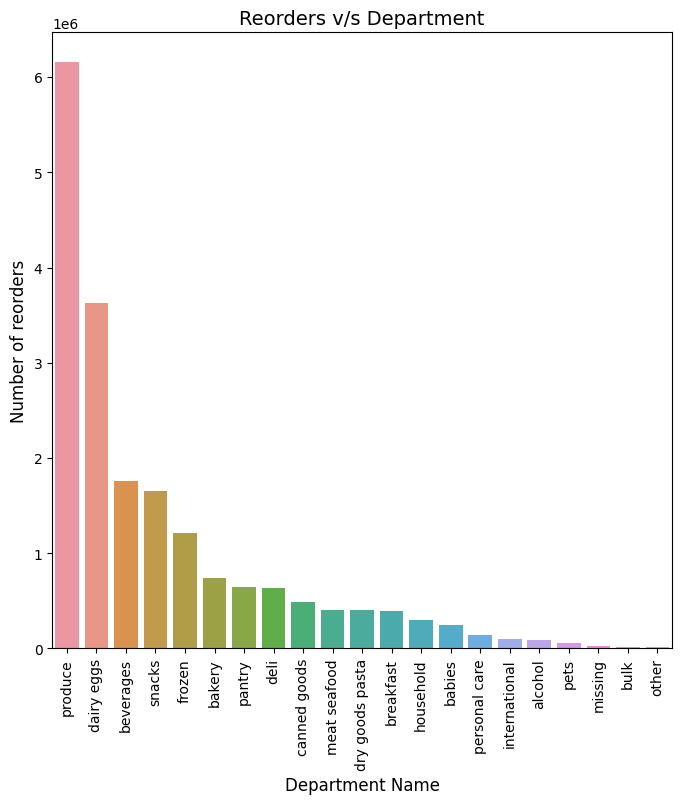

In [71]:
counts = df[df['reordered'] == 1]['department'].value_counts()
bar_plot(counts,'Department Name','Number of reorders','Reorders v/s Department')

<AxesSubplot: xlabel='department,reordered', ylabel='Number Of Reorders'>

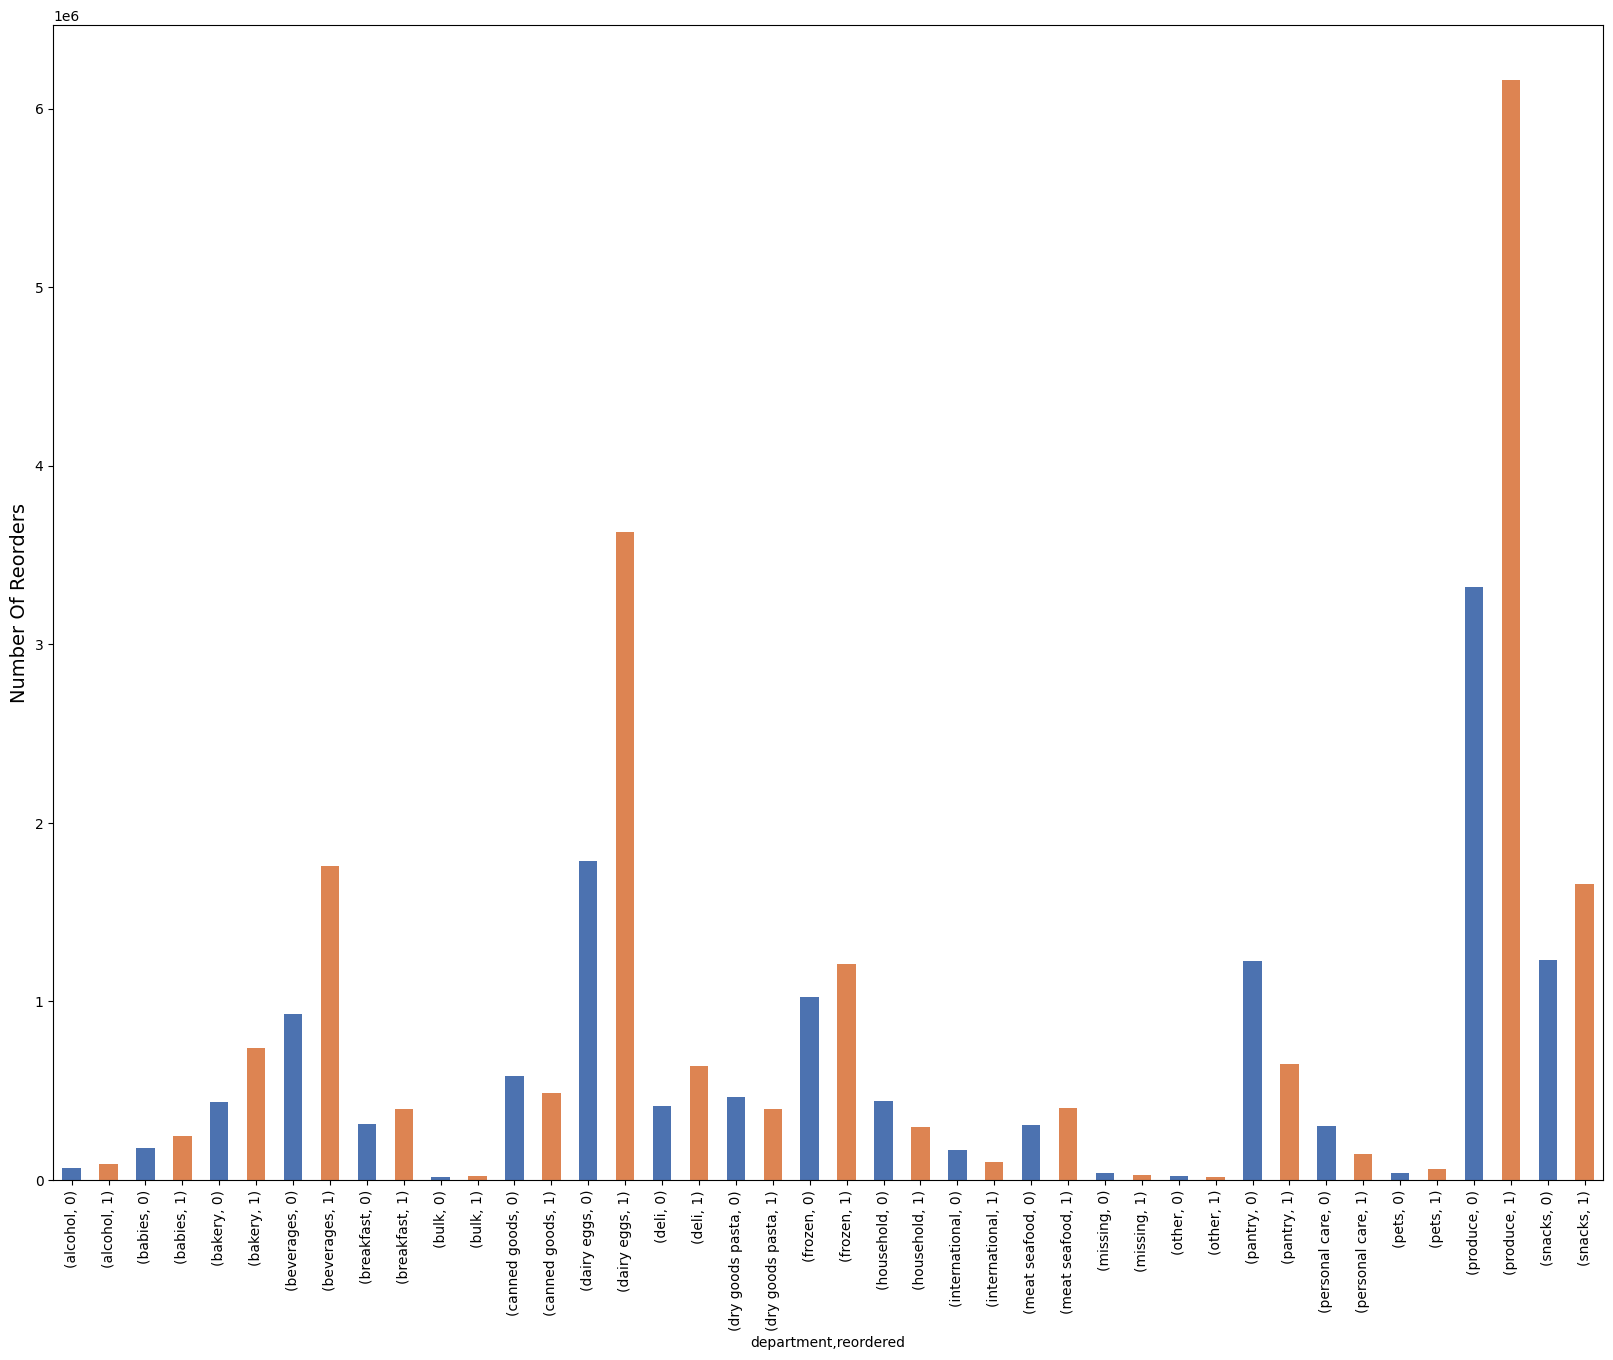

In [72]:
plt.figure(figsize=(20,15))
groups = df.groupby(['department','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observations:</b>
<li>As expected maximum number of reorders came from produce department (Fresh fruits and vegetables).
<li>Least number of reorders came from alcohol, pets, personal care department.
<li>Number of reorders in the dairy eggs department is also great.

<h3>4.19 Which aisle receives the most reorders? (Reorders v/s Aisles)

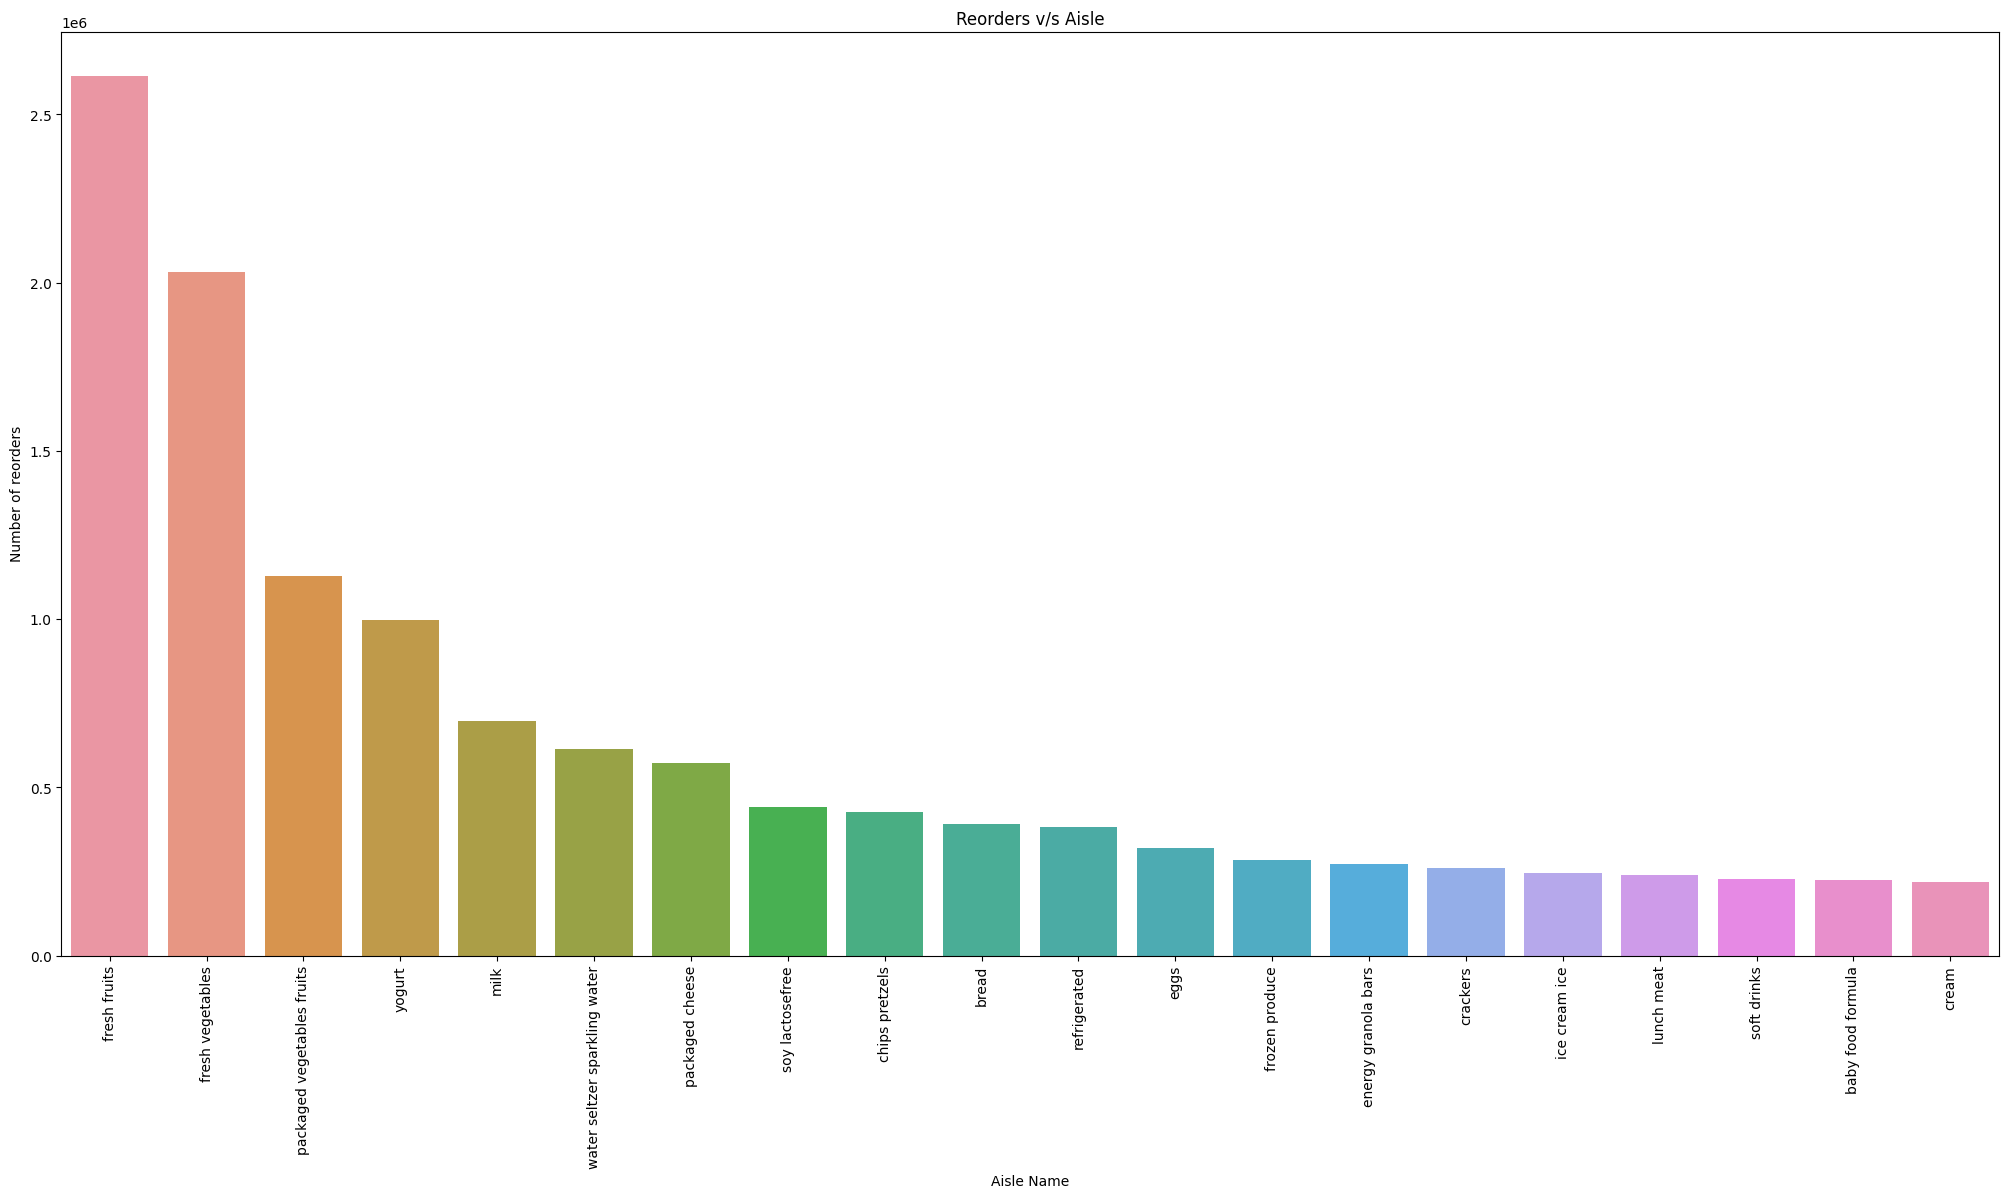

In [73]:
counts = df[df['reordered'] == 1]['aisle'].value_counts()[:20]
plt.figure(figsize=(25,12))
sns.barplot(x=counts.index, y=counts.values)
plt.ylabel('Number of reorders', fontsize = 10)
plt.xlabel('Aisle Name',fontsize = 10)
plt.title('Reorders v/s Aisle', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: xlabel='aisle,reordered', ylabel='Number Of Reorders'>

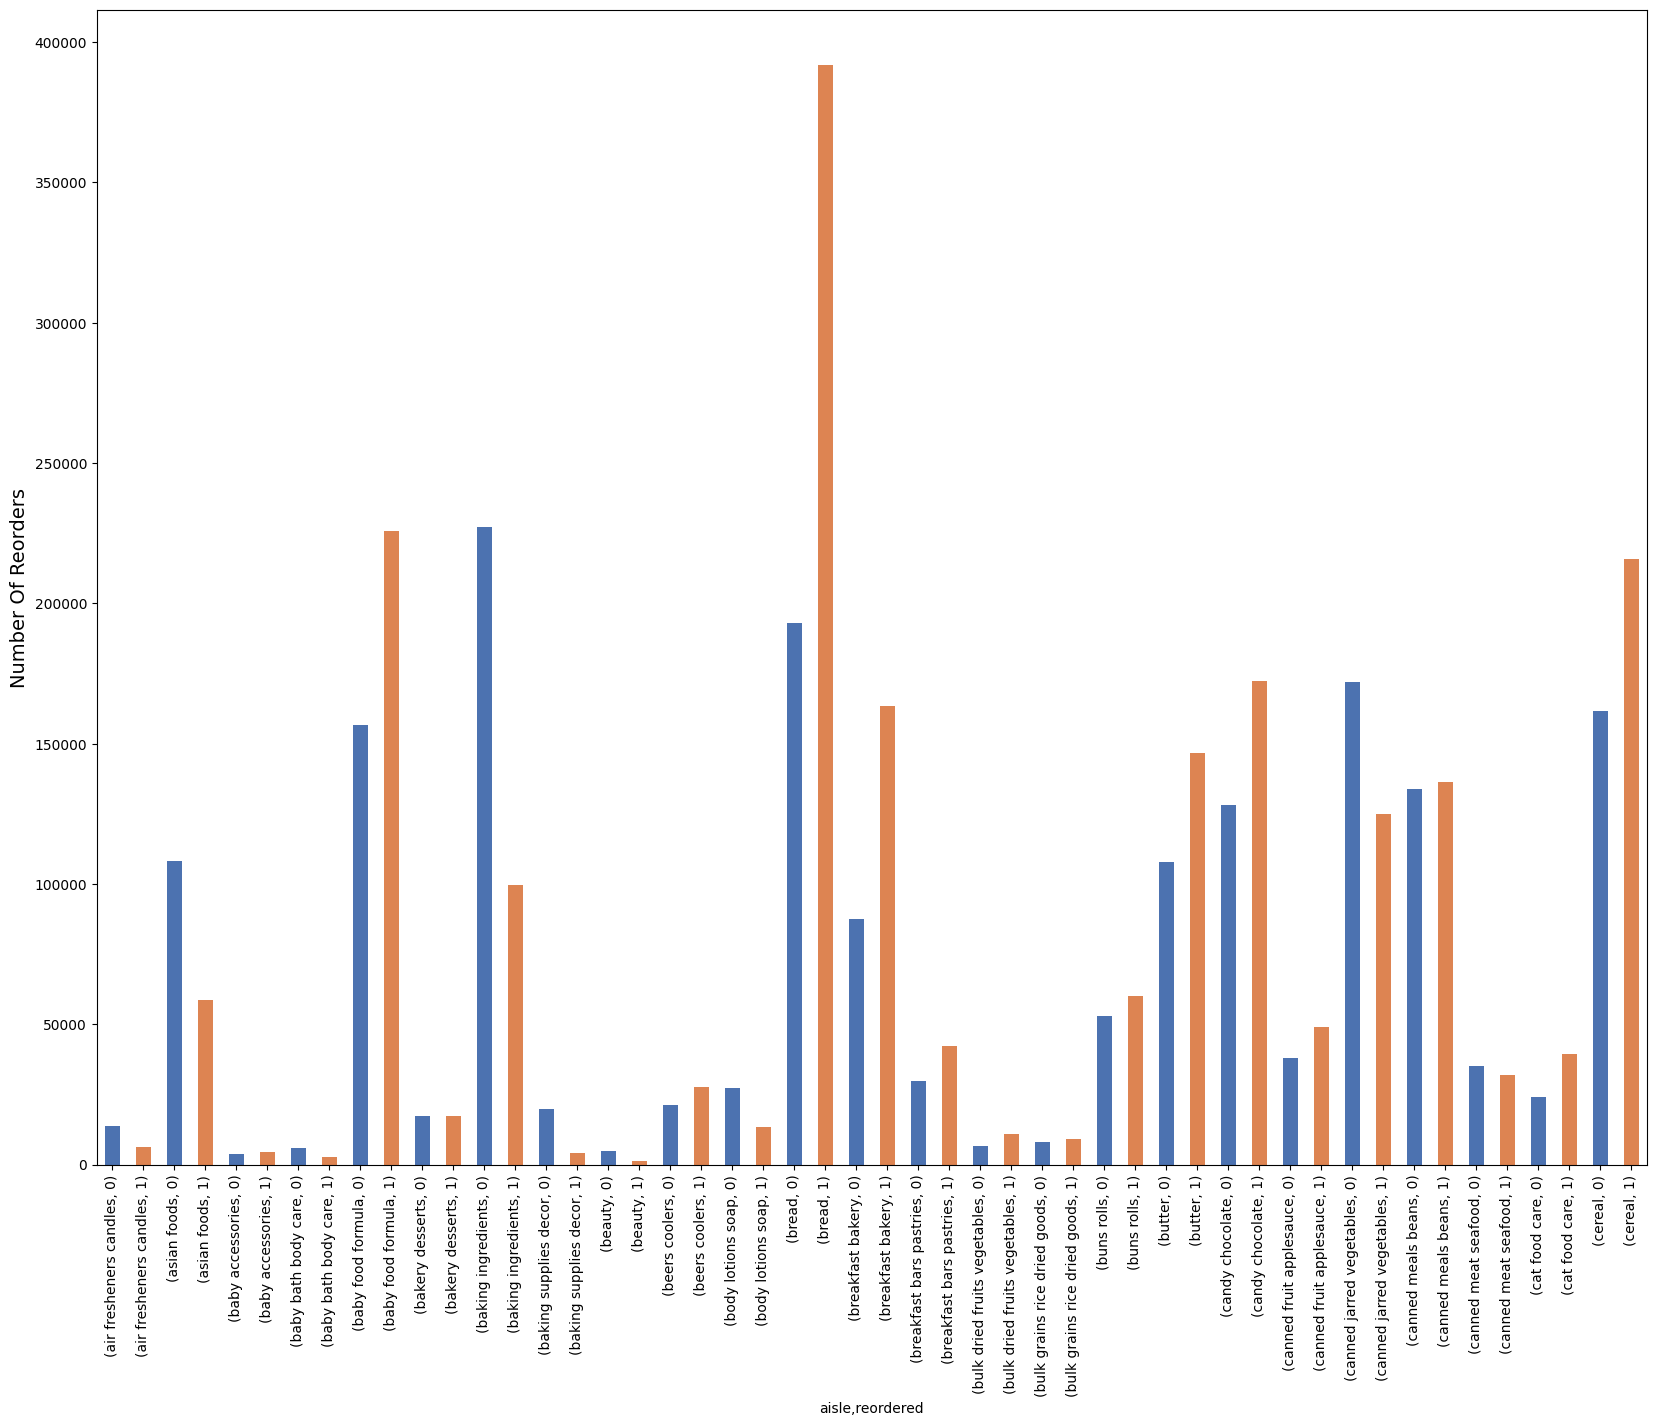

In [74]:
plt.figure(figsize=(20,15))
groups = df.groupby(['aisle','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups =groups[:50]
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observation:</b>
<li>Maximum number of reorders came from Fresh fruits and vegetables aisle.

<h3>4.20 Reorder ratio vs day of the week

In [77]:
#Calculating the reorder ratio
df_grouped = df.groupby(['order_dow'])['reordered'].aggregate("mean")
df_grouped

order_dow
0    0.585276
1    0.603843
2    0.589771
3    0.586272
4    0.590979
5    0.595470
6    0.574369
Name: reordered, dtype: float64

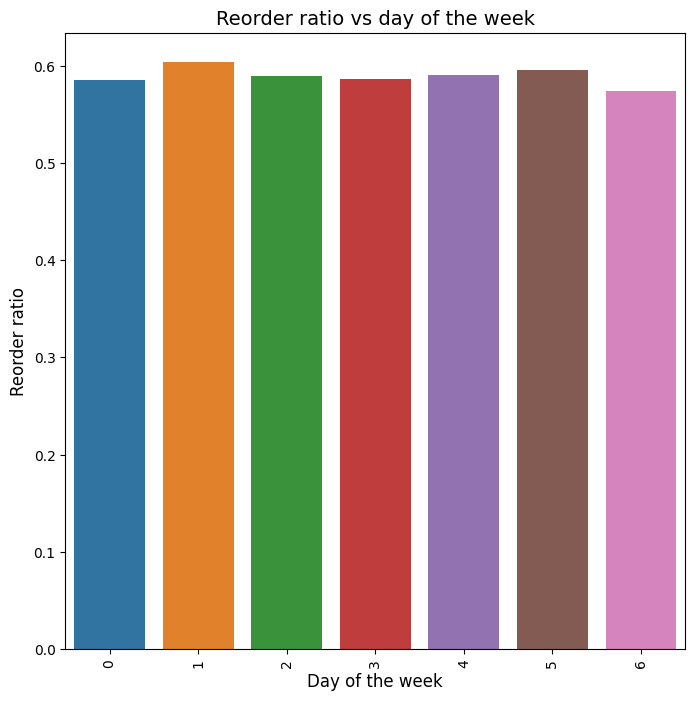

In [78]:
bar_plot(df_grouped,"Day of the week","Reorder ratio","Reorder ratio vs day of the week")

<b>Observation:</b>
<li>We can see that the reorder ratio is highest on weekends. This means that the majority of reorders occur over the weekend.

<h3>4.21 Reorder ratio vs Order Hour of day

In [79]:
#Calculating the reorder ratio
df_grouped = df.groupby(['order_hour_of_day'])['reordered'].aggregate("mean")
df_grouped.head()

order_hour_of_day
0    0.565500
1    0.557114
2    0.554455
3    0.559498
4    0.571195
Name: reordered, dtype: float64

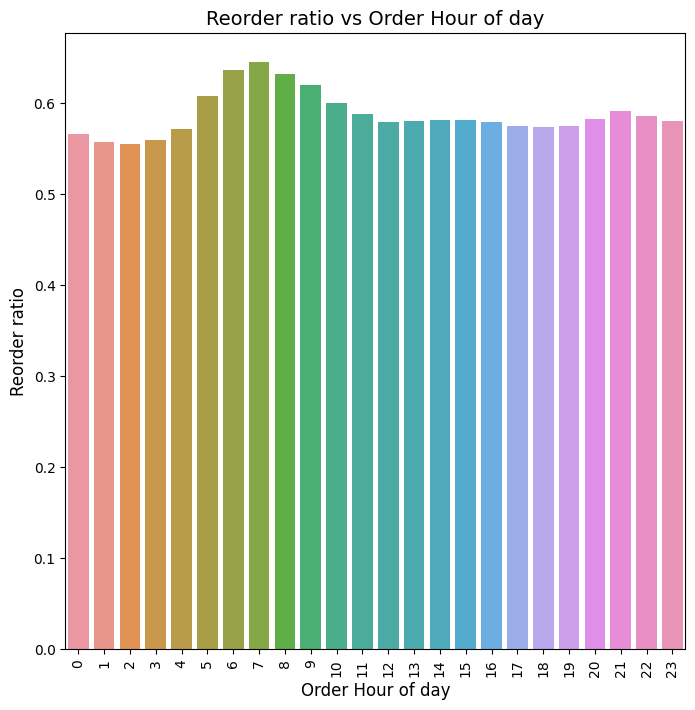

In [80]:
bar_plot(df_grouped,"Order Hour of day","Reorder ratio","Reorder ratio vs Order Hour of day")

<b>Observation:</b>
<li>Reorder ratio is highesr at 7 a.m
<li>Reorder ratio is lower than usual between 1 am to 2 am.

<h2>5. Conclusions From EDA

<li> The dataset is made up of six files, each of which contains different information about the insta-cart. It contains information about the products, the aisles where the product is located, what product was reordered, how many days the user shopped, and so on. Priors, Train, and Test are the three sections of the dataset. Prior orders contain data about users and previous orders.
<li>There are 21 departments and 134 aisles in total.
<li>The most orders were placed over the weekend, on Saturday and Sunday. This implies that customers shop more on weekends. 
<li> When it comes to peak hours, the majority of orders were placed between 9 a.m. and 5 p.m.
<li>The highest number of orders were placed after a 7-day and 30-day gap. Customers place orders or shop more frequently on a weekly and monthly basis.
<li>The most number of customers, approximately 23986, have placed four orders.
<li>Produce, dairy eggs, snacks, beverages, and frozen are the top five best-selling departments.
We don't have any data on revenue generated by department, so we can't say which department is the most profitable; we can only say which department has the most sales.
<li> The produce department includes fresh fruits and vegetables, packaged fruits and vegetables, and fresh herbs. Fresh fruits receive the most orders in the produce department, while packaged products receive the least. The fresh vegetables section is not far behind. This would also indicate that the majority of customers who order here appear to be diet conscious and prefer healthy products to beverages, packaged goods, snacks, and so on.
<li> As expected, fruits such as bananas, avocados, and spinach are the most popular products. Banana is the most popular, with 400000 reorders.
<li> Saturday was the busiest day for reorders. On a Wednesday, the fewest reorders were placed.
<li>Between 8 a.m. and 9 p.m., the reorder rate is high.
<li> Products numbered 1 through 18 in the add to cart order appear to have a chance of being reordered. Products ranked 25 and up in the add to cart order have a very low chance of being reordered.
<li> The majority of reorders are placed over the weekend or at the end of the month.
<li> Furthermore, the produce department receives the largest number of reorders (Fresh fruits and vegetables).